# Tanzanian Wells

## 1. Overview

This notebook examines Tanzania's water wells, and uses classification models to predict whether a water point is non-fonctional.<br>
The organization of this notebook follows the CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process.

## 2. Business Understanding

According to a World Bank [study](https://www.worldbank.org/en/country/tanzania/publication/tanzania-economic-update-universal-access-to-water-and-sanitation-could-transform-social-and-economic-development#:~:text=Only%2061%25%20of%20households%20in,hygiene%2C%20according%20to%20SDG%20definitions), access to a basic water supply is available to just 61% of households in Tanzania, basic sanitation is accessible to 32%, and basic hygiene is within reach for less than half of households.

The country has a substantial number of existing water points, but a considerable portion of these wells either require maintenance or have completely failed, resulting in limited access to clean water.

The objective of this project is to develop a machine learning classifier that can predict if a water well in Tanzania is non functional. By analyzing various factors such as the type of pump, the quantity of water in the well and when or who installed it, we aim to categorize wells into different conditions, such as 'non functional' or 'functional'. 

This predictive model will serve as a valuable tool for organizations and non-governmental agencies involved in water resource management and infrastructure development in Tanzania.

The target audience for this project is Non-Governmental Organizations (NGOs) focusing on improving access to clean water for populations in Tanzania such as [WaterAid](https://www.wateraid.org/where-we-work/tanzania), [Charity Water](https://www.charitywater.org/our-projects/tanzania) or [Tanzania Water Project](https://www.tanzaniawaterproject.org/). 

## 3. Data Understanding

The data comes from drivendata.org, a platform which hosts data science competitions with a focus on social impact. The source of data provided by DrivenData is the Tanzanian Ministry of Water, and is stored by Taarifa. 

The actual dataset can be found [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/) under the 'Data download section'. 

4 files are indicated. The below files were downloaded and renamed as follows:
- Training set values: training_set_values
- Training set labels: training_set_labels
- Test set values: test_set_values

These are the files used for the main modeling and predictive analysis. 
<br>
The test set values file is the one used to measure the accuracy of the model.

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Loading training_set_values dataset and saving it as df_values
df_values = pd.read_csv('data/training_set_values.csv')

In [3]:
# Inspecting df_values
df_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


The training set values has 59,400 rows, with 39 feature columns and 1 id column.

* `amount_tsh`: Total static head (amount water available to waterpoint)
* `date_recorded`: The date the row was entered
* `funder`: Who funded the well
* `gps_height`: Altitude of the well
* `installer`: Organization that installed the well
* `longitude`: GPS coordinate
* `latitude`: GPS coordinate
* `wpt_name`: Name of the waterpoint if there is one
* `num_private`: No description was provided for this feature
* `basin`: Geographic water basin
* `subvillage`: Geographic location
* `region`: Geographic location
* `region_code`: Geographic location (coded)
* `district_code`: Geographic location (coded)
* `lga`: Geographic location
* `ward`: Geographic location
* `population`: Population around the well
* `public_meeting`: True/False
* `recorded_by`: Group entering this row of data
* `scheme_management`: Who operates the waterpoint
* `scheme_name`: Who operates the waterpoint
* `permit`: If the waterpoint is permitted
* `construction_year`: Year the waterpoint was constructed
* `extraction_type`: The kind of extraction the waterpoint uses
* `extraction_type_group`: The kind of extraction the waterpoint uses
* `extraction_type_class`: The kind of extraction the waterpoint uses
* `management`: How the waterpoint is managed
* `management_group`: How the waterpoint is managed
* `payment`: What the water costs
* `payment_type`: What the water costs
* `water_quality`: The quality of the water
* `quality_group`: The quality of the water
* `quantity`: The quantity of water
* `quantity_group`: The quantity of water
* `source`: The source of the water
* `source_type`: The source of the water
* `source_class`: The source of the water
* `waterpoint_type`: The kind of waterpoint
* `waterpoint_type_group`: The kind of waterpoint

In [4]:
# Loading training_set_values dataset and saving it as df_labels
df_labels = pd.read_csv('data/training_set_labels.csv')

In [5]:
# Inspecting df_labels
df_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [6]:
# Checking the unique values of the target column
df_labels['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

The training set labels has the same number of rows, and contains the:
* `id` 
* `target column`: status group

The status group can be defined as: 

1. functional: the waterpoint is operational and there are no repairs needed
2. functional needs repair: the waterpoint is operational, but needs repairs
3. non functional: the waterpoint is not operational

## 4. Data Preparation

### 4. a. Joining values and labels datasets together

The first step of preparing the data is to merge both df_values and df_labels, as the latter contains the target value.
<br>
Both datasets are merged on the 'id' column.

In [7]:
# Merging both dataframes on the column 'id'
raw_df = df_values.merge(df_labels, on='id')

In [8]:
# Inspecting the new dataframe
raw_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


The new joined dataframe contains the same number of rows as the previous datasets: 59,400. It has 1 id column, 1 target column: status_group, and 39 feature columns.

### 4. b. Data transformation & cleaning

Data transformation and cleaning are an important step because they ensure the accuracy and reliability of data, which, in turn, improves the quality of models. Clean data intends to reduce bias and errors, making predictions more accurate and reliable.

#### 4. b. 1. Verifying and handling missing data 

In [9]:
# Checking for null values
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

The column `scheme_name` has a high number of null values and is contains the same information as `scheme_management`: who operates the waterpoint.  
As a consequence, it will be dropped entirely.

In [10]:
# Dropping the column scheme_name
raw_df.drop(['scheme_name'], axis=1, inplace=True)

In [11]:
# Inspecting the values of columns containing null information 
columns_with_null = raw_df.columns[raw_df.isnull().any()].tolist()

columns_with_null

for column in columns_with_null:
    print(column)
    print(raw_df[column].unique())
    print()

funder
['Roman' 'Grumeti' 'Lottery Club' ... 'Dina' 'Brown' 'Samlo']

installer
['Roman' 'GRUMETI' 'World vision' ... 'Dina' 'brown' 'SELEPTA']

subvillage
['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']

public_meeting
[True nan False]

scheme_management
['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']

permit
[False True nan]



Other columns' null values will be replaced by 'Unknown' as they contain a relatively few missing values, and handling them as 'Unknown' could be used to predict whether a well is functional or not.  

In [12]:
# Filling null values with 'Unknown'
for column in columns_with_null:
    raw_df[column].fillna('Unknown', inplace=True)

In [13]:
# Verifying the dataset no longer contains any null value
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

#### 4. b. 2. Removing unnecessary columns

The below  columns will be removed for the following reasons:

1. Irrelevant for predictions (i.e. date the row was entered, waterpoint name)
2. Contains similar information as another column (i.e. extraction_type, water_quality) 
3. Contains information which would require additional conversion (i.e. region_code, district_code)

* `id`: the identification number assigned to the water well 
* `date_recorded`: The date the row was entered
* `longitude`: GPS coordinate
* `latitude`: GPS coordinate
* `wpt_name`: Name of the waterpoint if there is one
* `num_private`: undefined
* `subvillage`: Geographic location
* `region_code`: Geographic location (coded)
* `region`: Geographic location. There are 21 regions, while location by basin can be provided with 9 categories. Choosing less detailed categories is preferred to prevent creating a sparse dataframe 
* `district_code`: Geographic location (coded)
* `lga`: Geographic location
* `ward`: Geographic location
* `recorded_by`: Group entering this row of data
* `scheme_management`: Who operates the waterpoint
* `extraction_type`: The kind of extraction the waterpoint uses
* `extraction_type_group`: The kind of extraction the waterpoint uses
* `management_group`: How the waterpoint is managed
* `payment`: What the water costs
* `payment_type`: Frequency of payment: while it would be interesting to understand link between payment and well functionality, this feature has no link with the quality of water type and should be investigated separately
* `water_quality`: The quality of the water
* `quantity_group`: The quantity of water
* `source`: The source of the water
* `source_class`: The source of the water
* `waterpoint_type`: The kind of waterpoint
* `waterpoint_type_group`: provides similar information as source type and extraction type

In [14]:
# Storing the columns defined above into a list 
columns_to_drop = ['id', 'date_recorded','longitude','latitude','wpt_name','num_private','subvillage','region_code', 'region','district_code','lga','ward','recorded_by','scheme_management','extraction_type','extraction_type_group','management_group','payment', 'payment_type', 'water_quality','quantity_group','source','source_class','waterpoint_type', 'waterpoint_type_group']

In [15]:
# Dropping the columns from the dataframe and creating a new one
df = raw_df.drop(columns_to_drop, axis=1)

In [16]:
# Inspecting the new df
df.head()

,amount_tsh,funder,gps_height,installer,basin,population,public_meeting,permit,construction_year,extraction_type_class,management,quality_group,quantity,source_type,status_group
0,6000.0,Roman,1390,Roman,Lake Nyasa,109,True,False,1999,gravity,vwc,good,enough,spring,functional
1,0.0,Grumeti,1399,GRUMETI,Lake Victoria,280,Unknown,True,2010,gravity,wug,good,insufficient,rainwater harvesting,functional
2,25.0,Lottery Club,686,World vision,Pangani,250,True,True,2009,gravity,vwc,good,enough,dam,functional
3,0.0,Unicef,263,UNICEF,Ruvuma / Southern Coast,58,True,True,1986,submersible,vwc,good,dry,borehole,non functional
4,0.0,Action In A,0,Artisan,Lake Victoria,0,True,True,0,gravity,other,good,seasonal,rainwater harvesting,functional


In [17]:
# Inspecting the new df's info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   funder                 59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              59400 non-null  object 
 4   basin                  59400 non-null  object 
 5   population             59400 non-null  int64  
 6   public_meeting         59400 non-null  object 
 7   permit                 59400 non-null  object 
 8   construction_year      59400 non-null  int64  
 9   extraction_type_class  59400 non-null  object 
 10  management             59400 non-null  object 
 11  quality_group          59400 non-null  object 
 12  quantity               59400 non-null  object 
 13  source_type            59400 non-null  object 
 14  status_group           59400 non-null  object 
dtypes:

The new dataframe still has 59,400 rows, but now contains 17 feature columns and 1 target column. 
14 of the features, including the target variable is a categorical data, so they will be one-hot encoded in the next section.

#### 4. b. 3. Transforming the classification into a binary one

* **Addressing imbalanced dataset - part 1**

The target column contains 3 categories. The dataset is highly imbalanced, and the status 'functional needs repair' only represents 7% of the rows. 


A well that is functional but needs repair can be considered non-functional because it does not reliably provide safe and consistent access to water, which is the primary function of a well. <br> 
As a consequence, all 'functional needs repair' statuses will be replaced by 'non functional,'

Transforming the classification from a ternary to a binary one will then address the imbalanced dataset. 

In [18]:
# Inspecting the values inside the column status_group
print(df['status_group'].unique())

['functional' 'non functional' 'functional needs repair']


In [19]:
# Verifying for data imbalance
print('Functional counts')
print(df['status_group'].value_counts())
print()
print()
print('Functional counts')
print(df['status_group'].value_counts(normalize=True))

Functional counts
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


Functional counts
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


The dataset is highly imbalanced, and the status 'functional needs repair' only represents 7% of the rows. 


A well that is functional but needs repair can be considered non-functional because it does not reliably provide safe and consistent access to water, which is the primary function of a well. <br> 
As a consequence, all 'functional needs repair' statuses will be replaced by 'non functional,'

Transforming the classification from a ternary to a binary one will start addressing the imbalanced dataset. 

In [20]:
# Replacing 'functional needs repair' by 'non functional'
df['status_group'] = df['status_group'].replace('functional needs repair', 
                                                'non functional')


In [21]:
# Verifying the replacement was correctly applied
print('Raw counts')
print(df['status_group'].value_counts())
print()
print()
print('Percentages')
print(df['status_group'].value_counts(normalize=True))

Raw counts
functional        32259
non functional    27141
Name: status_group, dtype: int64


Percentages
functional        0.543081
non functional    0.456919
Name: status_group, dtype: float64


If we had a model that *always* said  that the well was non functional, we would get an accuracy score of 0.456919, i.e. 45.7% accuracy, because about 45.7% of all wells are currently non functional. 

#### 4. b. 4. Converting other binary columns

Some categorical features are binary: true or false, so they will be replaced by:
* 0 if false
* 1 if true
<br>Some of the data contains 'unknown' data. If unknown, it will be considered false. 

The target column is not technically true or false but is binary as well, so it will be converted as the following:
* non functional: 1
* functional: 0 

We are choosing to predict whether a well is **non functional** or not, so the positive result (or 1) would be if the well was identified as non functional. 
This classification is due to the context we are working on. It is more important to understand whether a well is non functional and needs to be repaired, as lives depend on it. A population depending on a well could become sick or may die if they drank the water from a non fonctional well. 

This is why non functional becomes 1: it is what we are trying to predict. 

In [22]:
# Storing binary columns into a new dataframe
binary_columns = ['public_meeting', 'permit', 'status_group']

In [23]:
# Converting public_meeting, permit and status_group to binary encoding
for column in binary_columns:
    print('Before: '+ column, df[column].unique())
    df[column] = df[column].map({
        False: 0,
        True: 1,
        'Unknown': 0,
        'non functional': 1,
#         'functional needs repair': 0,
        'functional': 0

    }) 
    print('After: '+ column, df[column].unique())


Before: public_meeting [True 'Unknown' False]
After: public_meeting [1 0]
Before: permit [False True 'Unknown']
After: permit [0 1]
Before: status_group ['functional' 'non functional']
After: status_group [0 1]


In [24]:
# Verifying the new data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   funder                 59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              59400 non-null  object 
 4   basin                  59400 non-null  object 
 5   population             59400 non-null  int64  
 6   public_meeting         59400 non-null  int64  
 7   permit                 59400 non-null  int64  
 8   construction_year      59400 non-null  int64  
 9   extraction_type_class  59400 non-null  object 
 10  management             59400 non-null  object 
 11  quality_group          59400 non-null  object 
 12  quantity               59400 non-null  object 
 13  source_type            59400 non-null  object 
 14  status_group           59400 non-null  int64  
dtypes:

There are now 11 categorical columms. 

#### 4. b. 5. Categorizing Values With Too Many Details

##### First step: Counting Values in Categorical Variables

Some categorical variables such as funder or installer cannot be one-hot encoded directly, as they contain too many distinct values. Further data transformation is required.

In [25]:
# Creating the dataframe categoricals to handle the categorical columns
categoricals = df.select_dtypes(include=[object])
categoricals.head()

,funder,installer,basin,extraction_type_class,management,quality_group,quantity,source_type
0,Roman,Roman,Lake Nyasa,gravity,vwc,good,enough,spring
1,Grumeti,GRUMETI,Lake Victoria,gravity,wug,good,insufficient,rainwater harvesting
2,Lottery Club,World vision,Pangani,gravity,vwc,good,enough,dam
3,Unicef,UNICEF,Ruvuma / Southern Coast,submersible,vwc,good,dry,borehole
4,Action In A,Artisan,Lake Victoria,gravity,other,good,seasonal,rainwater harvesting


In [26]:
# Storing categorical columns to a list
categorical_columns = categoricals.columns.tolist()
# Creating an empty dictionary to store value counts for each column
value_counts_dict = {}

# Iterating through each categorical column and calculating value counts
for column in categorical_columns:
    value_counts = categoricals[column].value_counts()
    value_counts_dict[column]=value_counts

In [27]:
# Reviewing columns with the highest number of categories within each of them 
value_counts_dict

{'funder': Government Of Tanzania    9084
 Unknown                   3639
 Danida                    3114
 Hesawa                    2202
 Rwssp                     1374
                           ... 
 Muwasa                       1
 Msigw                        1
 Rc Mofu                      1
 Overland High School         1
 Samlo                        1
 Name: funder, Length: 1897, dtype: int64,
 'installer': DWE           17402
 Unknown        3658
 Government     1825
 RWE            1206
 Commu          1060
               ...  
 EWE               1
 SCHOO             1
 Got               1
 Fabia             1
 SELEPTA           1
 Name: installer, Length: 2145, dtype: int64,
 'basin': Lake Victoria              10248
 Pangani                     8940
 Rufiji                      7976
 Internal                    7785
 Lake Tanganyika             6432
 Wami / Ruvu                 5987
 Lake Nyasa                  5085
 Ruvuma / Southern Coast     4493
 Lake Rukwa             

Funder and Installer are the two columns with the highest number of categories and seem to have very similar results. We will first focus on funders. 


##### Second step: Categorizing Columns Requiring It

<u>Funders</u> like any column, contains 59,400 rows. It is formed by 1,897 unique values. In order to organize them into similar categories, a research of each funder was done to identify if the organization was considered:
1. **Bilateral**: the government from another country funded the water well
2. **Government**: the government of Tanzania, or a programme funded by the government, or local, governmental agencies funded the water well  
3. **NPO_NGO**: the water well is funded by a non-profit organization or a non-governmental organization
4. **Private**: the fund comes from a private source: either individual or a company 
5. **Religious**: a religious organization funded the well
6. **Unknown & Minor**: the funder was not or could not be identified, or had funded less than 150 projects

The research was divided into two categories: 
- those which had funded at 150 projects were researched individually
- the others were categorized as minor funders

In a normal distribution, data outside the 75th percentile would be considered outliers. The goal of the above detailed classification was to get as close to the 75th percentile as possible. <br>
The column contains 59,400 rows, but currently has 3,658 funders identified as 'Unknown', leavingg 55,742 rows of funders to be categorized. Categorizing data up to the 75th percentile would classify over 41,806 rows. 


By setting the limit on funders who had paid for the wells to 150, this allowed to identify and categorize 43,177 funders, meeting our 75th percentile objective. 

In [28]:
categoricals['funder'].value_counts()

Government Of Tanzania    9084
Unknown                   3639
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Muwasa                       1
Msigw                        1
Rc Mofu                      1
Overland High School         1
Samlo                        1
Name: funder, Length: 1897, dtype: int64

In [29]:
# Printing all rows for categorization but commented out for the rest of the code dfor better memory use
# pd.set_option('display.max_rows', None)

In [30]:
# Identifiying funders that funded up 150 water wells 
categoricals[['funder']].groupby('funder').filter(lambda x: len(x) <= 150).value_counts()

funder                       
Mkinga Distric Coun              150
Lvia                             147
Concern World Wide               145
Unhcr                            137
No                               134
                                ... 
Makori                             1
Makonder                           1
Makondakonde Water Population      1
Makona                             1
Zingibali Secondary                1
Length: 1837, dtype: int64

In [31]:
# Counting funders that funded over 150 water wells 
categoricals[['funder']].groupby('funder').filter(lambda x: len(x) > 150).value_counts()

funder                        
Government Of Tanzania            9084
Unknown                           3639
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                              

In [32]:
# Ensuring enough data is categorized by counting how much would represent classiying funders that funded at least 150 wells
categoricals[['funder']].groupby('funder').filter(lambda x: len(x) > 150).value_counts().sum()

43177

A copy of the column `funder` will be created `funder_organization` to then replace each of the categories with the ones defined above.

In [33]:
# Creating column funders_organization with values from funders 
categoricals['funder_organization'] = categoricals['funder']
categoricals['funder_organization']

0                  Roman
1                Grumeti
2           Lottery Club
3                 Unicef
4            Action In A
              ...       
59395    Germany Republi
59396        Cefa-njombe
59397            Unknown
59398              Malec
59399         World Bank
Name: funder_organization, Length: 59400, dtype: object

In [34]:
# Verifying that the copy of the column was correctly done
assert (categoricals['funder_organization'] == categoricals['funder']).all(), "Columns are not equal."

# If the assertion passes, it will not raise an error.
print("Columns are equal.")

Columns are equal.


In [35]:
# Storing each of the identified funder into the corresponding list to then replace them
bilateral = ["Danida","Hesawa","Norad","Germany Republi","Netherlands","Rudep","Nethalan","World Bank","W.B"]
government = ["Government Of Tanzania","Rwssp","District Council","Dwsp","Water","Dwe","Lga","Private","Jaica","Rural Water Supply And Sanitat","Jica","Wsdp","Rc"]
NPO_NGO = ["World Vision","Unicef","Tasaf","Ministry Of Water","Amref","Oxfam","Wateraid","Mission","Shipo","Ded","Plan Int","Oxfarm","Oikos E.Afrika"]
private = ["Finw","Kiliwater","Dhv","Hifab","Adb","Fini Water","Isf","Ces(gmbh)","Fw","Ces (gmbh)","Private Individual","Lawatefuka Water Supply","Magadini-makiwaru Water"]
religious = ["Kkkt","Tcrs","Rc Church","Adra","Dmdd","Kkkt_makwale","Wvt","Roman"]
unknown = ["Unknown","0","Dh","Go", "Not Known "]

# Storing into a list the other funders: those that funded less than 150 wells
unknown_n_minor = categoricals['funder_organization'].value_counts()[categoricals['funder_organization'].value_counts() <= 150].index.tolist()



In [36]:
# Replacing each list of funders by their assigned category
categoricals['funder_organization'] = categoricals['funder_organization'].replace(bilateral, 'bilateral')
categoricals['funder_organization'] = categoricals['funder_organization'].replace(government, 'government')
categoricals['funder_organization'] = categoricals['funder_organization'].replace(NPO_NGO, 'NPO_NGO')
categoricals['funder_organization'] = categoricals['funder_organization'].replace(private, 'private')
categoricals['funder_organization'] = categoricals['funder_organization'].replace(religious, 'religious')
categoricals['funder_organization'] = categoricals['funder_organization'].replace(unknown, 'unknown_n_minor')
categoricals['funder_organization'] = categoricals['funder_organization'].replace(unknown_n_minor, 'unknown_n_minor')



In [37]:
# Verifying all strings were correctly replaced
categoricals['funder_organization'].unique()

array(['religious', 'unknown_n_minor', 'NPO_NGO', 'government',
       'bilateral', 'private'], dtype=object)

<u>Installer</u> 


<u>Installer</u> also contains 59,400 rows. The 2,145 identifiers were summarized into 8 categories, similar to funders - as follows:
1. **Bilateral**: the government from another country installed the water well
2. **Community**: installed by citizens, or the community
3. **Government**: the government of Tanzania, or a programme organized by the government, or local, governmental agencies installed the water well  
4. **NPO_NGO**: the water well was installed by a non-profit organization or a non-governmental organization
5. **Private**: the installation was done by a private source: either individual or a company 
6. **Religious**: a religious organization installed the well
7. **Unknown and minor**: the installation was not or could not be identified, or has installed less than 100 wells

The research was divided into two categories: 
- those which had installed at least 100 projects were researched individually
- the others were categorized as minor installers

Categorizing the above allowed to identify 45,658 - or 76.9%, which meets the 75th percentile goal. <br>

In [38]:
# Verified if Funder was the same as Installer, checking by chunks of 20 

# Defining the chunk size
chunk_size = 20

# Storing the total number of rows in the dataframe
total_rows = len(categoricals)

# Iterating through the DataFrame in chunks
for i in range(0, total_rows, chunk_size) :
    start_index = i
    end_index = min(i + chunk_size, total_rows)
    
    # Reviewing the chunk of data in the 'column'
    chunk = categoricals[['funder', 'installer']][start_index:end_index]
    
    # Processing the chunk
#     print(chunk)

In [39]:
# Identifiying installers that funded at least 150 water wells 
categoricals[['installer']].groupby('installer').filter(lambda x: len(x)  >= 100).value_counts()

installer                    
DWE                              17402
Unknown                           3658
Government                        1825
RWE                               1206
Commu                             1060
                                 ...  
WATER AID                          103
FINI WATER                         103
Halmashauri ya wilaya sikonge      102
Wizara ya maji                     100
HSW                                100
Length: 85, dtype: int64

In [40]:
# Ensuring enough data is categorized by counting how much would represent classiying funders that funded at least 150 wells
categoricals[['installer']].groupby('installer').filter(lambda x: len(x) > 100).value_counts().sum()

45658

A copy of the column `installer` will be created `installer_organization` to then replace each of the categories with the ones defined above.

In [41]:
# Creating column funders_organization with values from funders 
categoricals['installer_organization'] = categoricals['installer']
categoricals['installer_organization']

0               Roman
1             GRUMETI
2        World vision
3              UNICEF
4             Artisan
             ...     
59395             CES
59396            Cefa
59397         Unknown
59398            Musa
59399           World
Name: installer_organization, Length: 59400, dtype: object

In [42]:
# Verifying that the copy of the column was correctly done
assert (categoricals['installer_organization'] == categoricals['installer']).all(), "Columns are not equal."

# If the assertion passes, it will not raise an error.
print("Columns are equal.")

Columns are equal.


In [43]:
# Storing each of the identified funder into the corresponding list to then replace them
bilateral_inst = ["DANIDA", "Hesawa", "NORAD", "Norad", "Kuwait", "JAICA", "HE"]
community_inst = ["Commu", "Community", "Villagers", "wananchi"]
government_inst = ["DWE", "Government", "Central government", "District Council", "LGA", "District council", "Gover","Idara ya maji","Gove","Sengerema Water Department","DWSP","Distri","Centr","Handeni Trunk Main(","RWSSP", "Central govt", "GOVER", "JICA", "Central Government","MUWSA","Halmashauri ya wilaya sikonge","HSW","Wizara ya maji"]
NPO_NGO_inst = ["World vision","TASAF","AMREF","TWESA","ACRA","World Vision","SEMA","OXFAM","UNICEF","WVT","SHIPO","Mission","World","Amref","TWE","DED","WATER AID"]
private_inst = ["RWE", "CES", "WEDECO", "WU", "DW", "Da", "Kiliwater", "FinW", "DH", "Lawatefuka water sup", "Magadini-Makiwaru wa", "FW", "MWE", "Fini Water", "Private", "Artisan", "ISF", "Fini water", "DDCA", "Tardo", "Consulting Engineer", "FINI WATER"]
religious_inst = ["KKKT","TCRS","DANID","HESAWA","Dmdd","RC","KKKT _ Konde and DWE","RC CHURCH"]
unknown_inst = ["Unknown","0","Is","Ir"]

# Storing into a list the other funders: those that funded less than 150 wells
minor_installers = categoricals['installer_organization'].value_counts()[categoricals['installer_organization'].value_counts() <= 100].index.tolist()



In [44]:
# Replacing each list of installer by their assigned category
categoricals['installer_organization'] = categoricals['installer_organization'].replace(bilateral_inst, 'bilateral')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(community_inst, 'community')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(government_inst, 'government')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(NPO_NGO_inst, 'NPO_NGO')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(private_inst, 'private')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(religious_inst, 'religious')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(unknown_inst, 'unknown_n_minor')
categoricals['installer_organization'] = categoricals['installer_organization'].replace(minor_installers, 'unknown_n_minor')



In [45]:
# Verifying all strings were correctly replaced
len(categoricals['installer_organization'].unique())
categoricals['installer_organization'].unique()

array(['unknown_n_minor', 'NPO_NGO', 'government', 'bilateral',
       'community', 'religious'], dtype=object)

In [46]:
categoricals = categoricals.drop(['funder', 'installer'], axis=1)

<u>Management</u> 


External research was made to understand some of the terms, including [management definitions](https://washmatters.wateraid.org/publications/private-operation-in-the-rural-water-supply-in-central-tanzania-quick-fixes-and-slow) 


<u>Management</u>

* vwc: Village Water Committee: regulatory body with elected membership. They are the default management framework
* wug: Water User Group: sub-village level management groups responsible for operation and maintenance of the water point.
* water board: legal entity, autonomous from village government
* wua: Water User Association: A legal entity autonomous from village government that oversees the management of an entire extraction system.
* private operator: A privately funded extension to a water system
* parastatal: a company or organization which is owned by a country's government and often has some political power
* water authority: 
* other: 
* company: A legal entity sometimes under contract
* other - school: The water points are public but managed fully by the school
* trust: legal entity, autonomous from village government 
* unknown


Following the research on these categories, some of them can be grouped further together. 

* vwc and wug = Village Water Committee and Water User Group both refer to a village or sub-village management group 
* water board and trust = are both defined as a legal entity, autonomous from village government
* parastatal and water authority = eventually refer to organizations owned by the country's government
* other and other-school = both contain management types that cannot be defined as the above classifications
* private operator and company = both a privately funded extension to a water system


In [47]:
# Grouping the above categories together 

# vwc and wug
categoricals['management'] = categoricals['management'].replace('vwc', 'village_committee')
categoricals['management'] = categoricals['management'].replace('wug', 'village_committee')

# water board and trust
categoricals['management'] = categoricals['management'].replace('water board', 'board_n_trust')
categoricals['management'] = categoricals['management'].replace('trust', 'board_n_trust')

# water authority and parastatal
categoricals['management'] = categoricals['management'].replace('water authority', 'government')
categoricals['management'] = categoricals['management'].replace('parastatal', 'government')

# other and other school
categoricals['management'] = categoricals['management'].replace('other - school', 'other')

# private operator and company
categoricals['management'] = categoricals['management'].replace('company', 'private operator')

In [48]:
categoricals['management'].unique()

array(['village_committee', 'other', 'private operator', 'board_n_trust',
       'wua', 'government', 'unknown'], dtype=object)

In [49]:
len(categoricals['management'].unique())

7

##### Third step: Further Columns Dropping: Those With Similar Information

Now that both columns were categorized, they appear to show similar groups. In order to optimize the predictions, only one of the two columns should be kept. <br>
While both funders and installers are important, when it comes to determining the functionality of a water well, the expertise and competence of the installers are usually the key factors. 
<br> The `installer_organization` column will be kept 

In [50]:
# Dropping funder_organization column
categoricals = categoricals.drop(['funder_organization'], axis=1)

In [51]:
# Verifying the column was dropped
categoricals.columns

Index(['basin', 'extraction_type_class', 'management', 'quality_group',
       'quantity', 'source_type', 'installer_organization'],
      dtype='object')

#### 4. b. 5. Encoding Categorical Variables

This step enables non-numeric data to be processed and analyzed, facilitating meaningful pattern recognition and model training.
It uses the one-hot encoding method, which converts each category as a binary vector: 1 indicating the presence of the category, 0 indicating its absence.  

In [52]:
# One-hot encoding the categorical columns
one_hot_df = pd.get_dummies(categoricals)
one_hot_df.columns

Index(['basin_Internal', 'basin_Lake Nyasa', 'basin_Lake Rukwa',
       'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani',
       'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu',
       'extraction_type_class_gravity', 'extraction_type_class_handpump',
       'extraction_type_class_motorpump', 'extraction_type_class_other',
       'extraction_type_class_rope pump', 'extraction_type_class_submersible',
       'extraction_type_class_wind-powered', 'management_board_n_trust',
       'management_government', 'management_other',
       'management_private operator', 'management_unknown',
       'management_village_committee', 'management_wua',
       'quality_group_colored', 'quality_group_fluoride', 'quality_group_good',
       'quality_group_milky', 'quality_group_salty', 'quality_group_unknown',
       'quantity_dry', 'quantity_enough', 'quantity_insufficient',
       'quantity_seasonal', 'quantity_unknown', 'source_type_borehole',
       'source_type_d

In [53]:
# Verifying how many columns this provided
len(one_hot_df.columns)

47

#### 4. b. 6. Grouping Numeric and Encoded Categorical Variables

Now that we have our encoded categorical variables, the rest of the numeric columns dataframe will be grouped to this new one_hot_df to have a useable dataframe for our models. 

In [54]:
# Creating a numeric df
numeric_df = df.select_dtypes(include=['number'])

In [55]:
# Verifying its columns
numeric_df.columns

Index(['amount_tsh', 'gps_height', 'population', 'public_meeting', 'permit',
       'construction_year', 'status_group'],
      dtype='object')

In [56]:
# Now grouping both numeric and encoded categorical dataframes
combined_df = pd.concat([numeric_df, one_hot_df], axis=1)

#### 4. b. 7. Pre-modeling: exploration

Prior to modeling, let's explore the numeric DataFrame to get a sense of whether preprocessing will be necessary. 

,amount_tsh,gps_height,population,public_meeting,permit,construction_year,status_group
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,179.909983,0.858771,0.654074,1300.652475,0.456919
std,2997.574558,693.116350,471.482176,0.348261,0.475673,951.620547,0.498145
min,0.000000,-90.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,369.000000,25.000000,1.000000,1.000000,1986.000000,0.000000
75%,20.000000,1319.250000,215.000000,1.000000,1.000000,2004.000000,1.000000
max,350000.000000,2770.000000,30500.000000,1.000000,1.000000,2013.000000,1.000000


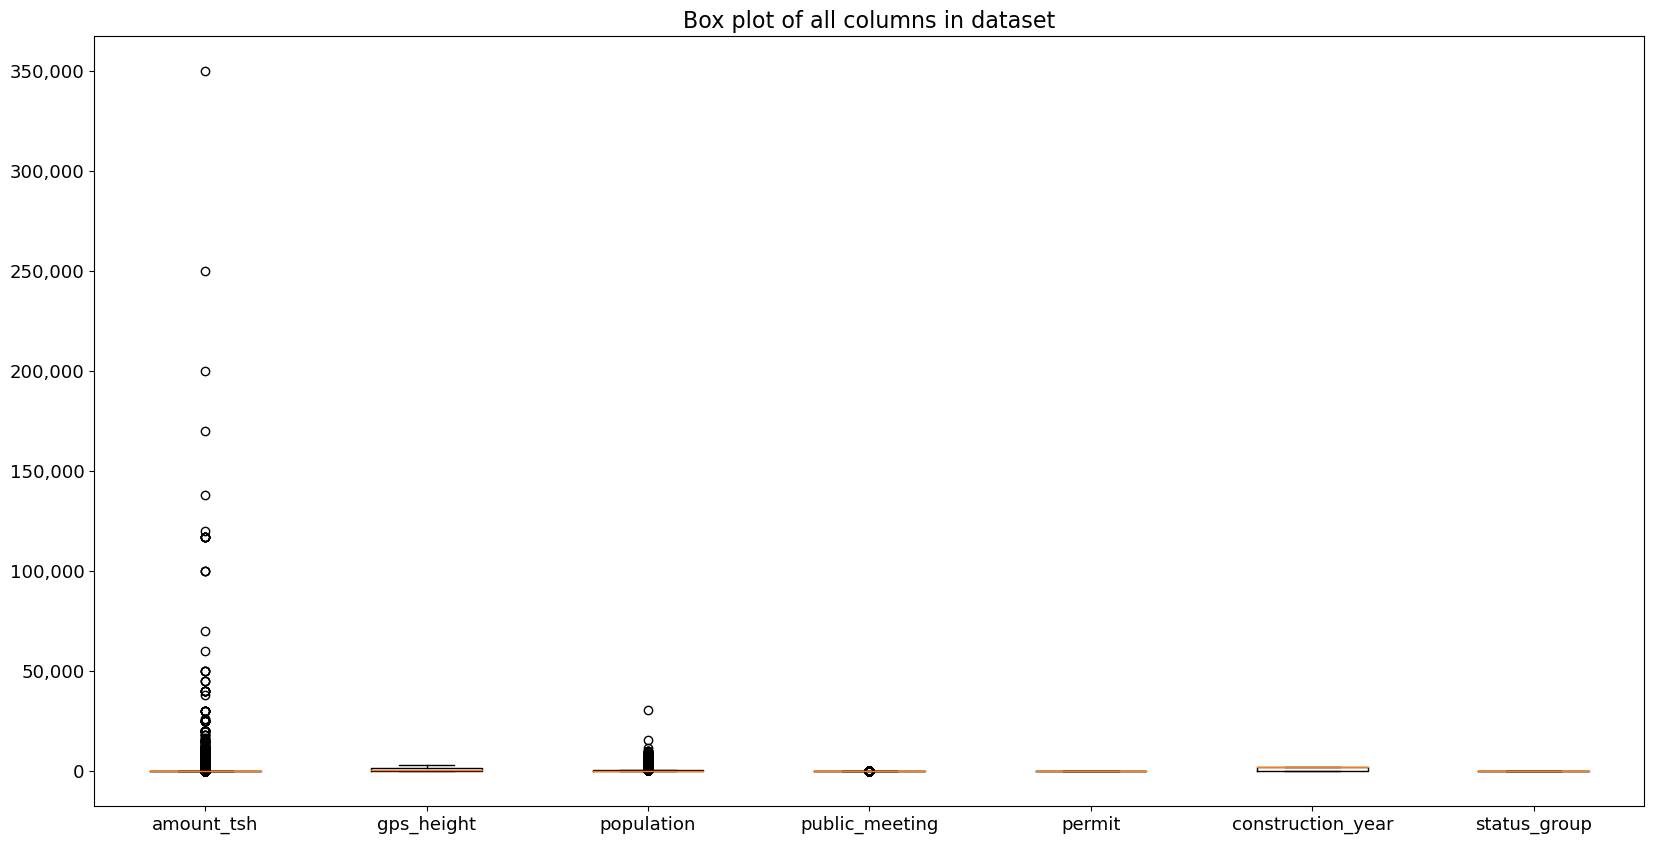

In [57]:
# Importing FuncFormatter
from matplotlib.ticker import FuncFormatter

# Explore the dataset
display(numeric_df.describe())

# Creating a box plot of each column
plt.figure(figsize=(20, 10))
plt.boxplot([numeric_df[col] for col in numeric_df.columns])

plt.xticks(range(1, len(numeric_df.columns.values) +1 ), numeric_df.columns.values, fontsize=13)
plt.yticks(fontsize=13)

# Format y-axis labels with commas at thousands
y_formatter = FuncFormatter(lambda x, pos: "{:,.0f}".format(x))
plt.gca().yaxis.set_major_formatter(y_formatter)


plt.title("Box plot of all columns in dataset", fontsize=16)

plt.show()

The ranges of numbers for each column seem to have largely vary between one another, so the dataset will most likely require to be scaled to be used for modeling.

## 5. Modeling

Several preprocessing techniques were applied across these models:
1. Data Categorization 
2. Handling of Missing Values 
3. One-hot encoding categorical variables 
4. Scaling

4 main models were explored:
1. Logistic Regression
2. k-Nearest Neighbor 
3. Decision Tree
4. Random Forest 



Each models' parameters were tuned using the following approaches:
1. SMOTE
3. Stratified K-Fold 
4. Recursive Features Elimination 
5. Hyperparameter tuning:
    * manual 
    * Combinatoric Grid Searching



### 5. a. Logistic Regression

#### 5. a. 1. Performing a Train-Test Split

In [58]:
# Splitting df into X and y
X = combined_df.drop('status_group', axis=1)
y = combined_df['status_group']

The dataset is being divided into two separate subsets: a training set, and a testing (or validation) set. The validation set will allow to assess the performance of the model. 

Two parameters are assigned when dividing the dataset:
* random_state=42 
   - setting a random seed of 42 ensures that the data split is reproducible
* stratify=y 
   - stratified sampling ensures the class distribution is maintained in both sets to address potential class imbalance issues

In [59]:
# Performing train-test split with random_state=42 and stratify=y 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

Because stratify=y was applied, the percentages of non functional water wells in the train and test target should be similar. 

In [60]:
# Inspecting the percentages of non functional water wells in train and test targets: 
print("Train percent of non functional wells:", y_train.value_counts(normalize=True)[1])
print("Test percent of non functional wells:", y_test.value_counts(normalize=True)[1])

Train percent of non functional wells: 0.45692480359147025
Test percent of non functional wells: 0.4569023569023569


#### 5. a. 2. Building and Evaluating a Baseline Model

We will begin by building  a vanilla logistic regression model that did not go through hyperparameter tuning. The random_state will be set to 42 for reproducibility.

We will then evaluate the model on our training data (X_train and y_train), using the metrics for that purpose: 
- cross_val_score: function producing an accuracy score for each data point in our dataset through cross-validation.  
- log loss: measures how closely the model's predicted probabilities match the actual class labels. A lower log loss indicates better model predictions.

When using cross_val_score, we need to utilize "negative log loss" due to the internal implementation requirements. Consequently, the code negates the result to ensure proper computation.

In [61]:
# Importing the relevant class and function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [62]:
# Instantiating a LogisticRegression with random_state=42 for reproducibility
baseline_model = LogisticRegression(random_state=42)

In [63]:
# Using cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")

baseline_neg_log_loss_cv = -(baseline_neg_log_loss_cv.mean())
baseline_neg_log_loss_cv

C:\Users\albane.colmenares\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\albane.colmenares\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

0.55603059022353

Log loss is not particularly interpretable - so in order to make more sense of it, the above number will be compared to log loss if we had a model that just chose the majority class: 0. 

In [64]:
# Calculating log loss if we had a model that just chose the majority class: 0 every time 

from sklearn.metrics import log_loss
log_loss(y_train, np.zeros(len(y_train)))

16.469239245541385

Because loss is a metric where lower is better, our baseline model is an improvement (0.556) over simply guessing the majority class every time (16.469).

The value 0.556 will be a useful baseline as we continue modeling to see if we are the predictions are actually improving or just getting slightly better performance by chance.  

#### 5. a. 3. Preprocessing Data Through Custom Cross Validation Function

Preprocessing is an important step in data science pipeline because it transforms raw data into a suitable format for training models. It also contributes to improve model accuracy and performance by handling issues like missing values, removing unnecessary columns, scaling, and encoding categorical variables.

* **Addressing class imbalance - part 2: sampling with SMOTE**

Because we are using preprocessing techniques that differ for train and validation data, we will need a custom function rather than simply preprocessing the entire X_train and using cross_val_score from scikit-learn. 

Due to the presence of a class imbalance, it is advisable to incorporate a resampling technique, with SMOTE being the specific method of choice.<br>
SMOTE stands for synthetic minority oversampling. It creates synthetic examples of the minority class to help train the model. 

* **Scaling data**

Certain variables predominantly have small values: around 0 or 1, whereas others contain values in the thousands. This indicates the need to introduce scaling to standardize and normalize the units of the different columns. 

This is also what caused the ConvergenceWarning to be raised: it shows the logistic regression's gradient descent algorithm is struggling to find an optimal answer. <br>
The StandardScaler method will be used for scaling the dataset's features (independent variables) that are on a different scale.

* **Addressing class imbalance - part 3: StratifiedKFold**

 Stratified K-Fold cross-validation is a technique that ensures that each fold of the data maintains the same class distribution as the whole dataset. This is particularly important when dealing with imbalanced datasets. Using StratifiedKFold allows to get a more robust estimate of the model's performance.

While it does not show it on the above code, cross_val_score also uses `StratifiedKFold` for classification tasks. <br>
`StratifiedKFold` gives the necessary information to make 5 separate train-test split wihtin `X_train`. Then, `cross_val_score` contains other steps to fit and evaluate the provided model. 

Below, we will break down the same code above, but now using `StratifiedKfold`.

In [65]:
# Equivalent of the code above, using StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Creating negative log loss as it doesn't exist as something that can be imported
neg_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Instantiating the model (with same parameters as code above)
baseline_model = LogisticRegression(random_state=42)

# Creating a list to hold the score from each fold
kfold_scores = np.ndarray(5)

# Instantiating a splitter object and looping over its result
kfold = StratifiedKFold()
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    # Extracting train and validation subsets using the provided indices
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Cloning the provided model and fit it on the train subset
    temp_model = clone(baseline_model)
    temp_model.fit(X_t, y_t)
    
    # Evaluating the provided model on the validation subset
    neg_log_loss_score = neg_log_loss(temp_model, X_val, y_val)
    kfold_scores[fold] = neg_log_loss_score
    
-(kfold_scores.mean())

C:\Users\albane.colmenares\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\albane.colmenares\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

0.55603059022353

The log loss result is the same as the baseline log loss initially recorded, since the code essentially does the same as above. 

Now we can tune parameters in order to address the class imbalance.

By setting sampling_strategy=0.85, SMOTE will generate synthetic samples for the minority class to make it larger. It will aim to create enough synthetic samples so that the minority class (non-functional) has 85% as many samples as the majority class.

In [66]:
# Importing relevant sklearn and imblearn classes
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

def custom_cross_val_score(estimator, X, y):
    # Creating a list to hold the scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # Instantiating a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extracting train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Instantiating StandardScaler
        scaler = StandardScaler()
        # Fitting and transforming X_t
        X_t_scaled = scaler.fit_transform(X_t)
        # Transforming X_val
        X_val_scaled = scaler.transform(X_val)
        
        # Instantiating SMOTE with random_state=42 and sampling_strategy=0.85
        sm = SMOTE(random_state=42, sampling_strategy=0.85)
        # Fitting and transforming X_t_scaled and y_t using sm
        X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_scaled, y_t)
        
        # Cloning the provided model and fitting it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_oversampled, y_t_oversampled)
        
        # Evaluating the provided model on the train and validation subsets
        neg_log_loss_score_train = neg_log_loss(temp_model, X_t_oversampled, y_t_oversampled)
        neg_log_loss_score_val = neg_log_loss(temp_model, X_val_scaled, y_val)
        kfold_train_scores[fold] = neg_log_loss_score_train
        kfold_val_scores[fold] = neg_log_loss_score_val
        
    return kfold_train_scores, kfold_val_scores

# Running LogisticRegression with the parameters class_weight={1: 0.85} which align with the weighting created by our SMOTE process
model_with_preprocessing = LogisticRegression(random_state=42, class_weight={1: 0.85})


preprocessed_train_scores, preprocessed_neg_log_loss_cv = custom_cross_val_score(model_with_preprocessing, X_train, y_train)
- (preprocessed_neg_log_loss_cv.mean())


0.5439387616706302

This improvement is likely due to The combination of better cross-validation, feature scaling, and addressing class imbalance using SMOTE resulted in a lower negative log loss - in other words: a better model performance.

#### 5. a. 4. Building and Evaluating Additional Logistic Regression Models

Using the function created in the previous step, we will build multiple logistic regression models with different hyperparameters in order to minimize log loss.

We also want to verify whether our model is overfitting: have we over-trained on the training data and the model cannot perform well on the test data?
We will then examine and compare the training and validation scores from our existing modeling process.

In [67]:
# Comparing scores between train and test data
print("Train:     ", -preprocessed_train_scores)
print("Validation:", -preprocessed_neg_log_loss_cv)

Train:      [0.54347459 0.54319387 0.54293029 0.54317623 0.54202016]
Validation: [0.54269265 0.54391826 0.54369858 0.54329728 0.54608704]


It does not seem like we are overfitting. If we were, the scores on training data would be significantly better than those on the validation data, despite SMOTE limiting comparing these numbers directly.

#### Verifying if under-fitting

We could be underfitting due to a too high regularization. We will then verify the regularization used by default. 

In [68]:
# Verifying the regularization used by default by our LogisticRegression model. 
model_with_preprocessing.get_params()

{'C': 1.0,
 'class_weight': {1: 0.85},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

That first key-value pair, 'C': 1.0, specifies the regularization strength. <br>C is defined as the inverse of regularization strength and must be a positive float. Smaller values indicate stronger regularization. 

#### Reducing Regularization

We will then instantiate a LogisticRegression model with the same hyperparameters as above, but with a lower regularization, so a higher `C`, before evaluating its performance.

In [69]:
# Instantiating a model with lower regularization
model_less_regularization = LogisticRegression(
    random_state=42,
    class_weight={1: 0.85},
    C=1e5
)

In [70]:
# Evaluating that model using custom_cross_val_score
less_regularization_train_scores, less_regularization_val_scores = custom_cross_val_score(
    model_less_regularization,
    X_train,
    y_train
)


print("Previous Model")
print("Train average:     ", -preprocessed_train_scores.mean())
print("Validation average:", -preprocessed_neg_log_loss_cv.mean())
print("Current Model")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())

Previous Model
Train average:      0.5429590287181459
Validation average: 0.5439387616706302
Current Model
Train average:      0.54295926022202
Validation average: 0.5439400837684263


By reducing regularization, the results worsen slightly, both on the training set and the validation set. 

#### Alternative Solver

We will try using an alternative solver and type of regularization penalty to improve the model. We were currently using the default solver and type of regularization penalty:

In [71]:
# Printing the current params used 
print("solver:", model_less_regularization.get_params()["solver"])
print("penalty:", model_less_regularization.get_params()["penalty"])

solver: lbfgs
penalty: l2


The `saga` penalty will be used, due to the size of our dataset. <br>
We will then create a model that uses solver="saga" and penalty="elasticnet". We will then use the l1_ratio argument to specify the mixing of L1 and L2 regularization. We will specify this, by assigning a value between zero, to not use only L2 regularization - and less than one, to not use only L1 regularization.

In [72]:
# Trying an alternative solver
model_alternative_solver = LogisticRegression(
    random_state=42,
    class_weight={1: 0.85},
    C=1e5,
    solver="saga",
    penalty="elasticnet",
    l1_ratio=0.5
)

# Evaluating its performance
alternative_solver_train_scores, alternative_solver_val_scores = custom_cross_val_score(
    model_alternative_solver,
    X_train,
    y_train
)

print("Previous Model (Less Regularization)")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())
print("Current Model")
print("Train average:     ", -alternative_solver_train_scores.mean())
print("Validation average:", -alternative_solver_val_scores.mean())

C:\Users\albane.colmenares\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Previous Model (Less Regularization)
Train average:      0.54295926022202
Validation average: 0.5439400837684263
Current Model
Train average:      0.5429589447903653
Validation average: 0.5439392247714141


Results are now better: 

Log loss now shows improvement compared to the previous model. However, despite better log loss results, the model is producing a ConvergenceWarning again.
The tolerance `tol` specifies how close to zero the gradient must be in order to stop taking additional steps. It's possible that your model is finding a gradient that is close enough to zero, but slightly above the default tolerance, if everything otherwise looks good.

In [73]:
# Adding the tolerance parameter
model_alternative_solver = LogisticRegression(
    random_state=42,
    class_weight={1: 0.85},
    C=1e5,
    solver="saga",
    penalty="elasticnet",
    l1_ratio=0.5,
    tol=0.0002
    
)

# Evaluating its performance
alternative_solver_train_scores, alternative_solver_val_scores = custom_cross_val_score(
    model_alternative_solver,
    X_train,
    y_train
)

print("Previous Model (Less Regularization)")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())
print("Current Model")
print("Train average:     ", -alternative_solver_train_scores.mean())
print("Validation average:", -alternative_solver_val_scores.mean())

Previous Model (Less Regularization)
Train average:      0.54295926022202
Validation average: 0.5439400837684263
Current Model
Train average:      0.5429587898155301
Validation average: 0.5439388664468353


Preprocess the full training set and test set appropriately, then evaluate the final model with various classification metrics in addition to log loss. 

In [74]:
final_model = model_with_preprocessing

In order to evaluate the final model, we will preprocess both the complete training and test data, train the model on the full training data, and then evaluate it on the full validation dataset. Log loss will still be used as the initial evaluation metric. 

####  Preprocessing the Full Dataset

In [75]:
# Instantiate StandardScaler
scaler = StandardScaler()
# Fitting and transforming X_train
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)

# Converting into a DataFrame
scaled_df_train = pd.DataFrame(X_train_scaled, columns=X.columns)
scaled_df_train.head()


# Transforming X_test
X_test_scaled = scaler.transform(X_test)

# Instantiating SMOTE with random_state=42 and sampling_strategy=0.85
sm = SMOTE(random_state=42, sampling_strategy=0.85)

# Fitting and transforming X_train_scaled and y_train using sm
X_train_oversampled, y_train_oversampled =  sm.fit_resample(X_train_scaled, y_train)

In [76]:
# Fitting the final model 
final_model.fit(X_train_oversampled, y_train_oversampled)

LogisticRegression(class_weight={1: 0.85}, random_state=42)

####  Evaluating the Model on the Test Data

Evaluating the model on the test dataset is essential to assess its performance on unseen data, and ensure it is not overfitting (if it learned so much on training data that it does not know to predict new data). 
To do this, 3 main score metrics will be used across this notebook: 

1. **Recall**
2. **Log loss**
3. **Accuracy**


In [77]:
# Relevant imports
from sklearn.metrics import log_loss, accuracy_score, recall_score

# Defining a function eval_scores to calculate and print score metrics for each model

def eval_scores(model_name, model, X, y):
    y_pred = model.predict(X)  # Predict the labels
    y_pred_proba = model.predict_proba(X)  # Predict the probabilities
    
    log_loss_value = log_loss(y, y_pred_proba)
    recall_value = recall_score(y, y_pred)
    accuracy_value = accuracy_score(y, y_pred)
    
    
    print("Evaluation scores for {} ".format(model_name))
    
    print("Log Loss: {}".format(log_loss_value))
    print("Recall Score: {}".format(recall_value))
    print("Accuracy Score: {}".format(accuracy_value))
    
    return log_loss_value, recall_value, accuracy_value 
    
model_name = 'Logistic Regression - Preprocessed Model'

# Calling the function and recording into the defined values
log_loss_reg, recall_reg, accuracy_reg = eval_scores(model_name, final_model, X_test_scaled, y_test)

Evaluation scores for Logistic Regression - Preprocessed Model 
Log Loss: 0.5437687306560569
Recall Score: 0.48312453942520267
Accuracy Score: 0.712996632996633


This model has improved log loss compared to our initial baseline model which was about 0.555189.

The model performance is slightly better when training on the full training set - which is rather typical, since models' performance improve, as data increases.

#### Accuracy
The model has an accuracy of 0.71299 - which means it correctly identifies the deficiency of a water well about 71.2% of the time, whereas always guessing that a well is non functional would only be accurate about 45.7% of the time.

#### Recall

Due to the data's context, **recall**  is the important metric to report, as false negatives are a bigger problem: if a well is labeled as functional (0) when it really is non-functional (1) - in which case, it would be a false negative, the consequences would be dramatic: populations' health could be negatively impacted if they were to drink this well's water.

With a recall of about 0.48312, there is about 48.02% that our model will correctly label a well as class 1: on functional. And about 51.98% chance our model will incorrectly label it as class 0 - functional. 

#### 5. a. 5. Recursive Feature Elimination

Now that we have a baseline model with a certain accuracy, let's see if we can improve its scores by diminishing the number of features. 

In [78]:
# Importing the necessary library
from sklearn.feature_selection import RFE

In [79]:
# We will use the scaled data 

In [80]:
# Running RFE to understand best scores by number of features 
# between 5 and 50, by increments of 5 

log_loss_scores = []
accuracy_scores = []
recall_scores = []

for n in range(5, 51, 5):
    # Instantiating the RFE object with our final model - and trying with 5 features
    rfe = RFE(estimator=final_model, n_features_to_select=n)

    # Fitting the RFE object to the training data 
    rfe.fit(X_train_oversampled, y_train_oversampled)

    # Accessing the ranking of features
    feature_ranking = rfe.ranking_
    feature_support = rfe.support_ 

    # Using the top selected features 
    selected_features = X_train_oversampled[:, feature_support]

    # Fitting the final Logistic Regression model using the selected features 
    final_model.fit(selected_features, y_train_oversampled)

    # Using the top selected features on validation data
    selected_X_test_scaled = X_test_scaled[:, feature_support]
    
    # Evaluating final_model with log loss
    log_loss_reg_selected = log_loss(y_test, final_model.predict_proba(selected_X_test_scaled))
    accuracy_reg_selected = accuracy_score(y_test, final_model.predict(selected_X_test_scaled))
    recall_reg_selected = recall_score(y_test, final_model.predict(selected_X_test_scaled))
    
    # Recording each score into their variable
    log_loss_scores.append(log_loss_reg_selected)
    accuracy_scores.append(accuracy_reg_selected)
    recall_scores.append(recall_reg_selected)
    
    # Printing evaluation scores
    
    print("Number of features: {}".format(n))
    print("Log Loss: {}".format(log_loss_reg_selected))
    print("Recall Score: {}".format(recall_reg_selected))
    print("Accuracy Score: {}".format(accuracy_reg_selected))
    print()
    print()

    
# Adding final model's records
log_loss_scores.append(log_loss_reg)
recall_scores.append(recall_reg)
accuracy_scores.append(accuracy_reg)
    
    
# Printing final model scores: with 53 features
    
print("Number of features: 53")
print("Log Loss: {}".format(log_loss_reg))
print("Recall Score: {}".format(recall_reg))
print("Accuracy Score: {}".format(accuracy_reg))
print()
print()

Number of features: 5
Log Loss: 0.5760099930466043
Recall Score: 0.3663964627855564
Accuracy Score: 0.691986531986532


Number of features: 10
Log Loss: 0.5614962020811218
Recall Score: 0.44097273397199704
Accuracy Score: 0.6987878787878787


Number of features: 15
Log Loss: 0.5529510510120974
Recall Score: 0.4546794399410464
Accuracy Score: 0.7088215488215488


Number of features: 20
Log Loss: 0.547401572047656
Recall Score: 0.46543846720707444
Accuracy Score: 0.7111111111111111


Number of features: 25
Log Loss: 0.5455984589040641
Recall Score: 0.4810611643330877
Accuracy Score: 0.7117171717171717


Number of features: 30
Log Loss: 0.5449018185834009
Recall Score: 0.48179808400884305
Accuracy Score: 0.7090909090909091


Number of features: 35
Log Loss: 0.5441150910932093
Recall Score: 0.479587324981577
Accuracy Score: 0.7103030303030303


Number of features: 40
Log Loss: 0.5437092711172613
Recall Score: 0.48518791451731763
Accuracy Score: 0.7141414141414142


Number of features: 45
L

Now, we have run and evaluated the models with all features. We will now determine the ones that recorded the top values. 

In [81]:
# Making copies of scores to retrieve their best values 
log_loss_scores_list = log_loss_scores.copy() 
accuracy_scores_list = accuracy_scores.copy()
recall_scores_list = recall_scores.copy()

In [82]:
# Findig the maximum value and its index
max_value_rec = max(recall_scores_list)
max_index_rec = recall_scores_list.index(max_value_rec)

print("Maximum value recall:", max_value_rec)
print("Index of maximum value recall:", max_index_rec)

Maximum value recall: 0.4866617538688283
Index of maximum value recall: 8


In [83]:
# Find the maximum value and its index
min_value = min(log_loss_scores_list)
min_index = log_loss_scores_list.index(min_value)
# Remove the minimum value to verify the second minimum value 
log_loss_scores_list.remove(min_value)
second_min_value = min(log_loss_scores_list)
second_min_index = log_loss_scores_list.index(second_min_value)

print("Minimum log loss:", min_value)
print("Index of minimum log loss:", min_index)
print("Index of second minimum log loss:", second_min_index)

Minimum log loss: 0.5437092711172613
Index of minimum log loss: 7
Index of second minimum log loss: 8


In [84]:
# Find the maximum value and its index
max_value_acc = max(accuracy_scores_list)
max_index_acc = accuracy_scores_list.index(max_value_acc)
# Remove the maximum value to verify the second max value 
accuracy_scores_list.remove(max_value_acc)
second_max_value = max(accuracy_scores_list)
second_max_index_acc = accuracy_scores_list.index(second_max_value)

print("Maximum accuracy:", max_value_acc)
print("Index of maximum accuracy:", max_index_acc)
print("Index of second maximum accuracy:", second_max_index_acc)

Maximum accuracy: 0.7141414141414142
Index of maximum accuracy: 7
Index of second maximum accuracy: 7


We will plot this on a chart to visualize each model's scores 

In [85]:
# Ensuring that we have the same number of scores for each metric
# print(len(log_loss_scores))
# print(len(accuracy_scores))
# print(len(recall_scores))

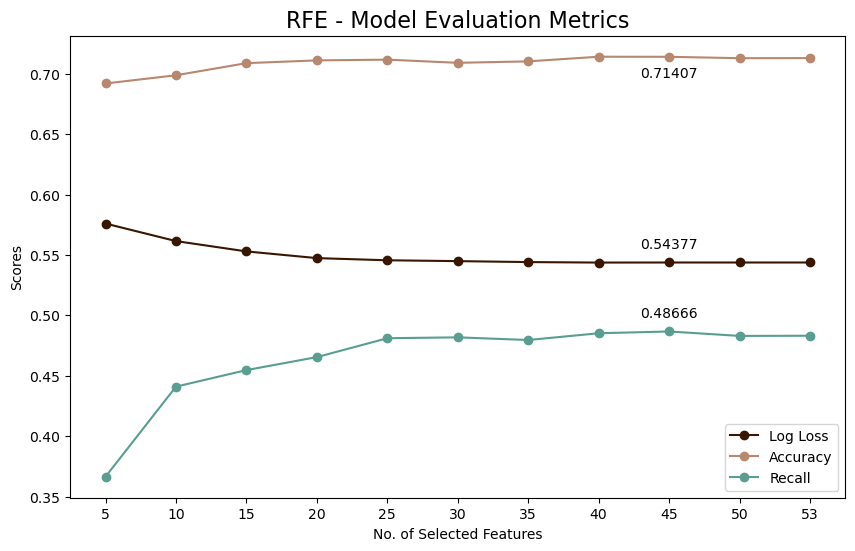

In [86]:
# Creating the x-axis values 
x = range(1, 12)

# Creating the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(x, log_loss_scores, label='Log Loss', marker='o', linestyle='-', color='#391600')
plt.plot(x, accuracy_scores, label='Accuracy', marker='o', linestyle='-', color='#B88770')
plt.plot(x, recall_scores, label='Recall', marker='o', linestyle='-', color='#599E91')

# Customizing x-axis tick locations and labels
x_ticks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 53]
plt.xticks(x, x_ticks)

# Adding labels and title
plt.xlabel('No. of Selected Features')
plt.ylabel('Scores')
plt.title('RFE - Model Evaluation Metrics', fontsize=16)

# Adding a legend
plt.legend()

# Showing the data label of the selected index
index_to_annotate = 8  # 8th index
plt.annotate(f'{log_loss_scores[index_to_annotate]:.5f}', (x[index_to_annotate], log_loss_scores[index_to_annotate]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate(f'{accuracy_scores[index_to_annotate]:.5f}', (x[index_to_annotate], accuracy_scores[index_to_annotate]), textcoords="offset points", xytext=(0,-15), ha='center')
plt.annotate(f'{recall_scores[index_to_annotate]:.5f}', (x[index_to_annotate], recall_scores[index_to_annotate]), textcoords="offset points", xytext=(0,10), ha='center')

# Saving the plot as a PNG with a transparent background
plt.savefig('images/RFE_models.png', transparent=True)

# Showing the plot
# plt.grid(True)
plt.show()

#### Recording and Evaluating the Best Model with Selected Features 

Recording the model with the best results: with 45 features

In [87]:
# Instantiating the RFE object with our final model - and trying with 45 features
best_rfe = RFE(estimator=final_model, n_features_to_select=45)

# Fitting the RFE object to the training data 
best_rfe.fit(X_train_oversampled, y_train_oversampled)

# Accessing the ranking of features
feature_ranking = best_rfe.ranking_
feature_support = best_rfe.support_ 

# Using the top selected features 
selected_features = X_train_oversampled[:, feature_support]

# Fitting the final Logistic Regression model using the selected features 
final_model.fit(selected_features, y_train_oversampled)

# Using the top selected features on validation data
selected_X_test_scaled = X_test_scaled[:, feature_support]


In [88]:
# Evaluating the model with log loss, recall and accuracy
model_rfe = 'Logistic Regression - RFE'


# Calling the function and recording into the defined values
log_loss_reg_selected, recall_reg_selected, accuracy_reg_selected = eval_scores(model_rfe, final_model, selected_X_test_scaled, y_test)

print("Number of features: {}".format(45))

Evaluation scores for Logistic Regression - RFE 
Log Loss: 0.5437699554671055
Recall Score: 0.4866617538688283
Accuracy Score: 0.7140740740740741
Number of features: 45


In [89]:
# Recording each score into their variable
log_loss_scores.append(log_loss_reg_selected)
accuracy_scores.append(accuracy_reg_selected)
recall_scores.append(recall_reg_selected)

The below columns, where the selection is indicated as True were selected by the RFE process. Their rank indicates their importance for the model. 

In [90]:
# Printing the columns with their selection and rank
for i, col in zip(range(scaled_df_train.shape[1]), scaled_df_train.columns):
    print(f"{col} selected={best_rfe.support_[i]} rank={best_rfe.ranking_[i]}")

amount_tsh selected=True rank=1
gps_height selected=True rank=1
population selected=True rank=1
public_meeting selected=True rank=1
permit selected=True rank=1
construction_year selected=True rank=1
basin_Internal selected=True rank=1
basin_Lake Nyasa selected=True rank=1
basin_Lake Rukwa selected=True rank=1
basin_Lake Tanganyika selected=True rank=1
basin_Lake Victoria selected=True rank=1
basin_Pangani selected=True rank=1
basin_Rufiji selected=True rank=1
basin_Ruvuma / Southern Coast selected=True rank=1
basin_Wami / Ruvu selected=True rank=1
extraction_type_class_gravity selected=False rank=6
extraction_type_class_handpump selected=True rank=1
extraction_type_class_motorpump selected=False rank=5
extraction_type_class_other selected=True rank=1
extraction_type_class_rope pump selected=True rank=1
extraction_type_class_submersible selected=True rank=1
extraction_type_class_wind-powered selected=False rank=7
management_board_n_trust selected=True rank=1
management_government select

#### 5. a. 6. Scores' Summary

The final scores for our Logistic Regression models, after having selected the best features are: 

In [91]:
print("Log Loss: {}".format(log_loss_reg_selected))
print("The log loss is below 1 and indicate a decent accuracy in predicting probabilities and consequently, a decent model performance.")
print()
print("Recall Score: {}".format(recall_reg_selected))
print("The true positive rate metric measuring the proportion of actual positive cases that the model correctly identifies is low. Less than 50% of positive cases were correctly identified.")
print()
print("Accuracy Score: {}".format(accuracy_reg_selected))
print()
print("The overall correctness of the model's predictions, considering both true positives and true negatives is decent: approximatively 71.41.%")
print()


Log Loss: 0.5437699554671055
The log loss is below 1 and indicate a decent accuracy in predicting probabilities and consequently, a decent model performance.

Recall Score: 0.4866617538688283
The true positive rate metric measuring the proportion of actual positive cases that the model correctly identifies is low. Less than 50% of positive cases were correctly identified.

Accuracy Score: 0.7140740740740741

The overall correctness of the model's predictions, considering both true positives and true negatives is decent: approximatively 71.41.%



### 5. b. K-Nearest Neighbors

* **Training speed**: Fast. It stores training data for future use, with scikit-learn optimizations for quicker predictions.<br>
* **Prediction speed**: Slower. The model examines all training records to find the k closest to a new record.<br>
* **Scaling requirement**: to ensure consistent distance scales for the distance-based algorithm.<br>
* **Key hyperparameters**: n_neighbors (controls the number of nearest neighbors; too few can overfit, too many can underfit), p, and metric (determines the distance measure for "nearest" neighbors).

#### 5. b. 1. Preparing Data for Modeling

X and y were defined for the Logistic Regression model

In [92]:
# Verifying X and y
X.head()
y.head()

0    0
1    0
2    0
3    1
4    0
Name: status_group, dtype: int64

Now that the features that did not impact as much the baseline model were eliminated, we will filter the dataset on the selected columns only: 

In [93]:
# Converting best_rfe.support_ to a list of column names
selected_columns = X.columns[best_rfe.support_]

# Creating a new DataFrame with only the selected columns
X_selected = X[selected_columns]

In [94]:
# Verifying that despite filtering on columns, the dataset length has not changed
len(X_selected)

59400

In [95]:
# Performing train-test split with random_state=42 and stratify=y, using the selected columns only
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state=42, stratify=y)

As we have seen when preparing data for Logistic Regression, columns have numbers in large ranges and data needs to be normalized. 

Normalization is done after splitting the data into training and test sets on purpose. This is prevent data leakage from the test set into the training set. 

Especially with K-NN classification, scaling the data ensures that all features contribute equally to the distance metrics. 

In [96]:
# Instantiating StandardScaler and fitting it on X_train
scaler = StandardScaler()
# scaler.fit(X_train)

In [97]:
# Fitting and transforming train set - and transforming test set 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
# Transforming the scaled data with selected features only into a DataFrame
scaled_selec_df_train = pd.DataFrame(X_train_scaled, columns=X_selected.columns)
# Inspecting it
scaled_selec_df_train.head()

,amount_tsh,gps_height,population,public_meeting,permit,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,...,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_shallow well,source_type_spring,installer_organization_NPO_NGO,installer_organization_bilateral,installer_organization_community,installer_organization_government,installer_organization_religious
0,-0.096832,0.772560,0.239329,0.403473,0.727060,0.741540,-0.388299,-0.306380,-0.204243,-0.347863,...,-0.103702,-0.067657,-0.201786,-0.629063,1.575555,-0.257685,-0.212915,-0.184593,-0.825307,-0.247222
1,-0.083585,-0.965035,-0.389074,0.403473,0.727060,0.744695,-0.388299,-0.306380,-0.204243,-0.347863,...,-0.103702,-0.067657,-0.201786,-0.629063,-0.634697,-0.257685,-0.212915,-0.184593,-0.825307,-0.247222
2,-0.098989,-0.965035,-0.391256,0.403473,-1.375402,-1.370154,-0.388299,3.263917,-0.204243,-0.347863,...,-0.103702,-0.067657,-0.201786,-0.629063,1.575555,-0.257685,-0.212915,-0.184593,-0.825307,-0.247222
3,-0.095908,0.675867,-0.063963,0.403473,0.727060,0.732075,-0.388299,-0.306380,-0.204243,-0.347863,...,-0.103702,-0.067657,-0.201786,-0.629063,1.575555,-0.257685,-0.212915,-0.184593,-0.825307,-0.247222
4,-0.098989,-0.965035,-0.391256,0.403473,0.727060,-1.370154,-0.388299,-0.306380,-0.204243,-0.347863,...,-0.103702,-0.067657,-0.201786,1.589666,-0.634697,-0.257685,-0.212915,-0.184593,1.211670,-0.247222


#### 5. b. 2. Building a Baseline kNN Model

We will first build an initial kNN model with the default hyperparameters. 

On this model, we will make predictions on the test set to measure its accuracy. 

In [99]:
# Importing K-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Creating the model
knn_baseline_model = KNeighborsClassifier()

# Fitting the classifier
knn_baseline_model.fit(X_train_scaled, y_train)

# Predicting on the test set
test_preds = knn_baseline_model.predict(X_test_scaled)

####  Evaluating the Baseline kNN Model

In order to evaluate the model, similar to Logistic Regression, cross_val_score will be used, with the scoring="neg_log_loss". As done on previous models, the mean of the cross-validated scores with be calculated and values negated. 
We will also evaluate the models using the two selected evaluation metrics: **Accuracy and Recall**. The evaluation will be done by passing the functions a set of `labels` (actual values) and a set of `preds` (predictions produced by the model). 

In [100]:
# Evaluating the baseline kNN model with our pre-defined function

knn_model = 'kNN - Baseline'

log_loss_knnbase, recall_knnbase, accuracy_knnbase = eval_scores(knn_model, knn_baseline_model, X_test_scaled, y_test)

Evaluation scores for kNN - Baseline 
Log Loss: 1.82165057395066
Recall Score: 0.7064112011790715
Accuracy Score: 0.7681481481481481


In [101]:
# Performing cross-validation as well

# Importing the necessary functions
from sklearn.model_selection import cross_val_score
knn_baseline_log_losscv = -cross_val_score(knn_baseline_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()

print("Cross Validation Log Loss: {}".format(knn_baseline_log_losscv))


Cross Validation Log Loss: 1.8462741717078024


* **Log Loss**: A log loss above 1 suggests that the model's predictions are less confident or less accurate.

* **Recall**: A recall score of about 0.7064 (70.64%) means that the model correctly identified roughly 70.64% of all actual positive instances (non functional wells) in the dataset. 

* **Accuracy**: An accuracy score of about 0.7651 (76.51%) indicates that the model correctly predicted 76.51% of all instances in the dataset.  


The negative log loss resulting from the baseline KNN model is far larger than the one recorded on our Logistic Regression models. We will then try to fine tune the parameters to see whether the model can make more accurate predictions.

#### 5. b. 3. Building Iterative Models to Find the Best kNN Model

<u>n_neighbors=50</u>

Maybe we are overfitting, since the default neighbors of 5 seems small compared to the large number of records in this dataset. Let's increase that number of neighbors 10x to see if it improves the results

In [102]:
# Trying other models
# Instantiating a model with 50 neighbors 
knn_second_model = KNeighborsClassifier(n_neighbors=50)

# Fitting the second classifier 
knn_second_model.fit(X_train_scaled, y_train)

# Predicting on the test set
second_test_preds = knn_second_model.predict(X_test_scaled)

####  Evaluating kNN Model with 50 neighbors

In [103]:
# Performing cross-validation as well
knn_second_model_log_losscv = -cross_val_score(knn_second_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()

print("Cross Validation Log Loss: {}".format(knn_second_model_log_losscv))

Cross Validation Log Loss: 0.5297369958984322


In [104]:
# Evaluating the baseline kNN model with our pre-defined function

knn_model_second = 'kNN - 50 Neighors'

log_loss_knn_second, recall_knn_second, accuracy_knn_second = eval_scores(knn_model_second, knn_second_model, X_test_scaled, y_test)

Evaluation scores for kNN - 50 Neighors 
Log Loss: 0.5235108061042335
Recall Score: 0.6100221075902726
Accuracy Score: 0.7476094276094276


These results show a clear improvement. Nevertheless recall remain somewhat low, for the importance it has. We will try to improve the model by changing the distance metric from euclidean to manhattan. 


<u>n_neighbors=50, metric='manhattan'</u>

In [105]:
# Trying other models
# Instantiating a model with 50 neighbors 
knn_third_model = KNeighborsClassifier(n_neighbors=50, metric="manhattan")

# Fitting the second classifier 
knn_third_model.fit(X_train_scaled, y_train)

# Predicting on the test set
third_test_preds = knn_third_model.predict(X_test_scaled)

####  Evaluating kNN Model with 50 neighbors and metric 'manhattan'

In [106]:
# Performing cross-validation log loss
knn_third_model_log_losscv = -cross_val_score(knn_third_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()

print("Cross Validation Log Loss: {}".format(knn_third_model_log_losscv))

Cross Validation Log Loss: 0.5206290263313449


In [107]:
# Evaluating the baseline kNN model with our pre-defined function
knn_model_third = 'kNN - 50 Neighbors - Manhattan'

log_loss_knn_third, recall_knn_third, accuracy_knn_third = eval_scores(knn_model_third, knn_third_model, X_test_scaled, y_test)

Evaluation scores for kNN - 50 Neighbors - Manhattan 
Log Loss: 0.5110744915489972
Recall Score: 0.6296241709653648
Accuracy Score: 0.7534680134680135


These results continue increasing. We will test increasing again the number of neighbors to verify whether this improves model performance even more. 

<u>n_neighbors=75, metric='manhattan'</u>

In [108]:
# Can we improve performance if increasing the number of neighbors again
# Instantiating a model with 50 neighbors 
knn_fourth_model = KNeighborsClassifier(n_neighbors=75, metric="manhattan")

# Fitting the second classifier 
knn_fourth_model.fit(X_train_scaled, y_train)

# Predicting on the test set
fourth_test_preds = knn_fourth_model.predict(X_test_scaled)

####  Evaluating kNN Model with 75 neighbors and metric 'manhattan'

In [109]:
# Performing cross-validation as well
knn_fourth_model_log_losscv = -cross_val_score(knn_fourth_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()

print("Cross Validation Log Loss: {}".format(knn_fourth_model_log_losscv))

Cross Validation Log Loss: 0.5125236772308649


In [110]:
# Evaluating the baseline kNN model with our pre-defined function
knn_model_fourth = 'kNN - 75 Neighbors - Manhattan'

log_loss_knn_fourth, recall_knn_fourth, accuracy_knn_fourth = eval_scores(knn_model_fourth, knn_fourth_model, X_test_scaled, y_test)

Evaluation scores for kNN - 75 Neighbors - Manhattan 
Log Loss: 0.5080102239905967
Recall Score: 0.6306558585114223
Accuracy Score: 0.749023569023569


Increasing the number of neighbors along with keeping the Manhattan metric improved the k-Nearst Neighbors model performance and allowed to reach the best results for this model and compared to logistic regression as well. 

#### 5. b. 4. Choosing and Evaluating the Best Model

In [111]:
# Storing the best model in the variable knn_best_model
knn_best_model = knn_fourth_model

In [112]:
# Storing all results into three different lists to plot them into a line graph
log_loss_knn = [log_loss_knnbase, log_loss_knn_second,log_loss_knn_third, log_loss_knn_fourth]
recall_knn = [recall_knnbase, recall_knn_second, recall_knn_third, recall_knn_fourth]
accuracy_knn = [accuracy_knnbase, accuracy_knn_second, accuracy_knn_third, accuracy_knn_fourth]


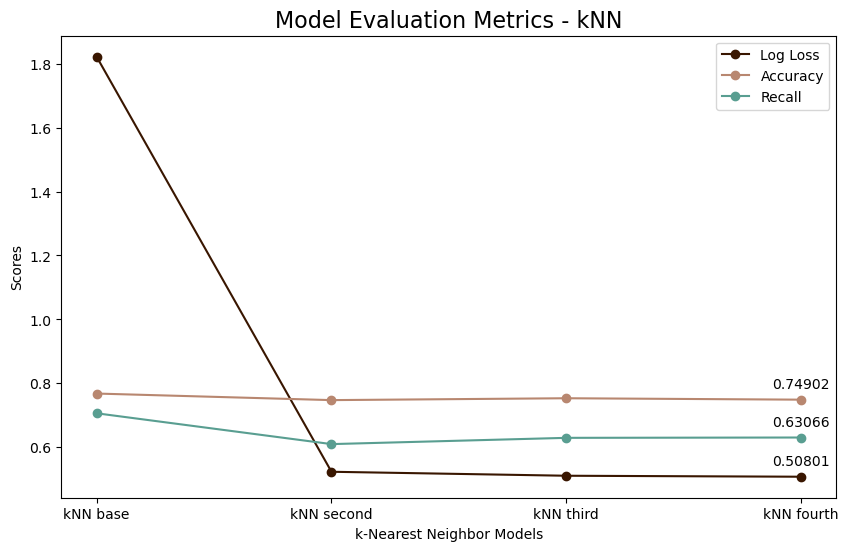

In [113]:
# Creating the x-axis values 
x = range(1, 5)

# Creating the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(x, log_loss_knn, label='Log Loss', marker='o', linestyle='-', color='#391600')
plt.plot(x, accuracy_knn, label='Accuracy', marker='o', linestyle='-', color='#B88770')
plt.plot(x, recall_knn, label='Recall', marker='o', linestyle='-', color='#599E91')

# Customizing x-axis tick locations and labels
x_ticks = ["kNN base","kNN second","kNN third","kNN fourth"]
plt.xticks(x, x_ticks)

# Adding labels and title
plt.xlabel('k-Nearest Neighbor Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics - kNN', fontsize=16)

# Adding a legend
plt.legend()

# Showing the data label of the selected index
index_to_annotate = 3  # 3nd index
plt.annotate(f'{log_loss_knn[index_to_annotate]:.5f}', (x[index_to_annotate], log_loss_knn[index_to_annotate]), textcoords="offset points", xytext=(0,8), ha='center')
plt.annotate(f'{accuracy_knn[index_to_annotate]:.5f}', (x[index_to_annotate], accuracy_knn[index_to_annotate]), textcoords="offset points", xytext=(0,8), ha='center')
plt.annotate(f'{recall_knn[index_to_annotate]:.5f}', (x[index_to_annotate], recall_knn[index_to_annotate]), textcoords="offset points", xytext=(0,8), ha='center')

# Saving the plot as a PNG with a transparent background
plt.savefig('images/knn_models.png', transparent=True)

# Showing the plot
plt.show()

#### 5. b. 5. Scores' Summary

In [114]:
# Calculating accuracy and recall
knn_model_best = 'Best kNN'

log_loss_knn_fourth, recall_knn_fourth, accuracy_knn_fourth = eval_scores(knn_model_best, knn_best_model, X_test_scaled, y_test)

Evaluation scores for Best kNN 
Log Loss: 0.5080102239905967
Recall Score: 0.6306558585114223
Accuracy Score: 0.749023569023569


These results indicate that the model is relatively accurate in predicting the functionality of water wells, with good log loss and accuracy values. 

However, the performance could be improved in correctly identifying non-functional wells, as the recall score is moderate but not very high.

In [115]:
# Model summary

print("Log Loss: {}".format(log_loss_knn_fourth))
print("The log loss is lower than the best one provided by Logistic Regression models ({}".format(log_loss_reg_selected) +"). The accuracy in predicting probabilities is improving.")
print()
print("Recall Score: {}".format(recall_knn_fourth))
print("The true positive rate metric has highly increased compared to the {}".format(recall_reg_selected) +" recorded from Logistic Regression models. The model now correctly identifies actual non-functional rates 63% of the time.")
print()
print("Accuracy Score: {}".format(accuracy_knn_fourth))
print("The model correctly predicted close to 75% of wells' conditions. This is an improvement compared to the previously recorded {}".format(accuracy_reg_selected))
print()


Log Loss: 0.5080102239905967
The log loss is lower than the best one provided by Logistic Regression models (0.5437699554671055). The accuracy in predicting probabilities is improving.

Recall Score: 0.6306558585114223
The true positive rate metric has highly increased compared to the 0.4866617538688283 recorded from Logistic Regression models. The model now correctly identifies actual non-functional rates 63% of the time.

Accuracy Score: 0.749023569023569
The model correctly predicted close to 75% of wells' conditions. This is an improvement compared to the previously recorded 0.7140740740740741



### 5. c. Decision Trees

Decision trees provide a flexible and interpretable machine learning approach, allowing various options to adapt to different datasets and objectives by fine-tuning hyperparameters.

* **Training speed**: Decision tree training can be slow due to considering splits involving all features, potentially leading to exponential computational time.<br>
* **Prediction speed**:Prediction with decision trees is medium-fast as it involves applying conditional statements, making it faster than some methods like k-nearest neighbors (kNN) but slower than others like logistic regression.<br>
* **Scaling requirement**:Decision trees do not require feature scaling, and for handling categorical data, you can use a LabelEncoder, as they don't assume equal distances between categories.<br>
* **Key hyperparameters**: Various hyperparameters related to "pruning" the tree are offered. Adjusting hyperparameters such as max_depth, min_samples_split, and others can control overfitting, but finding the right balance is crucial. The splitting logic can be modified as well by changing criteria to "entropy" or the splitter to "random".

#### 5. c. 1. Preparing Data for Modeling

The data was previously prepared - we will just ensure it uses the most recently selected ones. 

In [116]:
# Inspecting the previously selected data
X_selected.head()

,amount_tsh,gps_height,population,public_meeting,permit,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,...,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_shallow well,source_type_spring,installer_organization_NPO_NGO,installer_organization_bilateral,installer_organization_community,installer_organization_government,installer_organization_religious
0,6000.0,1390,109,1,0,1999,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,1399,280,0,1,2010,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,25.0,686,250,1,1,2009,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.0,263,58,1,1,1986,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [117]:
# Despite scaling not being necessary, we can keep the test and train splits we used for previous models. 
# Inspecting the preprocessed train split data
X_train_scaled[0]

array([-0.09683244,  0.77256034,  0.23932872,  0.40347329,  0.72706019,
        0.74153963, -0.38829914, -0.30638037, -0.20424344, -0.3478628 ,
       -0.45503338,  2.36767225, -0.39591952, -0.28684949, -0.33466192,
       -0.6192023 , -0.34928022, -0.08717455, -0.34019174,  4.33386844,
       -0.21810497, -0.12597954, -0.21480924, -1.95071958, -0.21233873,
       -0.09262986, -0.06207394, -0.11899384, -0.30991743, -0.18052296,
       -0.34330472,  0.89146314, -0.58555843, -0.27214584, -0.50140253,
       -0.10370223, -0.06765749, -0.20178612, -0.62906313,  1.57555488,
       -0.25768539, -0.21291538, -0.18459295, -0.82530726, -0.2472216 ])

#### 5. c. 2. Building a Baseline Decision Tree Model

Build and evaluate a baseline decision tree model, using default hyperparameters (with the exception of random_state=42 for reproducibility).

In [118]:
# Impoting the library
from sklearn.tree import DecisionTreeClassifier

# Instantiating the model 
dtree_baseline_model = DecisionTreeClassifier(random_state=42)

# Fitting the model to the training data
dtree_baseline_model.fit(X_train_scaled, y_train)

# Calculating and print cross_val negative log loss
dtree_baseline_log_losscv = -cross_val_score(dtree_baseline_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
dtree_baseline_log_losscv

6.27616100716701

**Evaluating the model**

In [119]:
# Evaluating the model
dt_model_base = 'Decision Tree Baseline'

# Running the evaluation metrics thanks to the previously defined function
log_loss_dt_base, recall_dt_base, accuracy_dt_base = eval_scores(
    dt_model_base, dtree_baseline_model, X_test_scaled, y_test)

Evaluation scores for Decision Tree Baseline 
Log Loss: 5.974108406144881
Recall Score: 0.6997789240972734
Accuracy Score: 0.7667340067340067


The scores indicate much worse results than either the logistic regression or the kNN models, particularly the log loss. 

The first assumption is that the model was highly overfitting,  since it was not "pruned" at all.

#### 5. c. 3. Building Iterative Models to Find the Best Decision Tree Model

The parameter that will be modified will be to increase the number of minimum samples leaf. 

Increasing this parameter simplifies the tree structure,  allows to promote better generalization to new data and reduces the risk of overfitting. 


As opposed to modeling with  k-Nearest Neighbors, scaling is not necessarily required when using a Decision Tree classifier. 
Since Decision Trees make splits based on individual features, they are not impacted by the scale of other ones.

<u>min_samples_leaf: 10</u>

In [120]:
# Instantiating the model with new parameter
dtree_second_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10)

# Fitting the model to the training data
dtree_second_model.fit(X_train_scaled, y_train)

# Calculating and print cross_val negative log loss
dtree_second_log_losscv = -cross_val_score(dtree_second_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
dtree_second_log_losscv

1.2344897344424464

**Evaluating the model**

In [121]:
# Evaluating the model
dt_second_model = 'Second Decision Tree '

# Running the evaluation metrics thanks to the previously defined function
log_loss_dt_second, recall_dt_second, accuracy_dt_second = eval_scores(
    dt_second_model, dtree_second_model, X_test_scaled, y_test)

Evaluation scores for Second Decision Tree  
Log Loss: 1.155028437585271
Recall Score: 0.7022844509948416
Accuracy Score: 0.7772390572390573


Raising the minimum number of samples per leaf from 1 to 10 effectively reduce overfitting.

We will now try to increase it further to review whether this can improve further the model's performance.  

<u>min_samples_leaf: 100</u>

In [122]:
# Instantiating the model with new parameter
dtree_third_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=100)

# Fitting the model to the training data
dtree_third_model.fit(X_train_scaled, y_train)

# Calculating and printing cross_val negative log loss
dtree_third_log_loss = -cross_val_score(dtree_third_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
dtree_third_log_loss

0.5100548158664351

**Evaluating the model**

In [123]:
# Evaluating the model
dt_third_model = 'Third Decision Tree '

# Running the evaluation metrics thanks to the previously defined function
log_loss_dt_third, recall_dt_third, accuracy_dt_third = eval_scores(
    dt_third_model, dtree_third_model, X_test_scaled, y_test)

Evaluation scores for Third Decision Tree  
Log Loss: 0.5229459255686422
Recall Score: 0.6471628592483419
Accuracy Score: 0.7608080808080808


The scoring metrics are now comparable to the ones we got previously, with a log loss below 1. Nevertheless, recall was reduced and went from 0.70 to below 0.65. 

The dataset was imbalanced and although data was scaled, Decision Trees are not sensitive to scaling the same way other models are. We will then indicate that the dataset is imbalanced, through the `class_weight` parameter. 

<u>class_weight: balanced</u>

In [124]:
# Instantiating the model with new parameter
dtree_fourth_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=100, class_weight="balanced")

# Fitting the model to the training data
dtree_fourth_model.fit(X_train_scaled, y_train)

# Calculating and printing cross_val negative log loss
dtree_fourth_log_loss = -cross_val_score(dtree_fourth_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
dtree_fourth_log_loss

0.5116867402863869

**Evaluating the model**

In [125]:
# Evaluating the model
dt_fourth_model = 'Fourth Decision Tree '

# Running the evaluation metrics thanks to the previously defined function
log_loss_dt_fourth, recall_dt_fourth, accuracy_dt_fourth = eval_scores(
    dt_fourth_model, dtree_fourth_model, X_test_scaled, y_test)

Evaluation scores for Fourth Decision Tree  
Log Loss: 0.524840138829187
Recall Score: 0.6957995578481946
Accuracy Score: 0.7574410774410775


While Recall score increased, both log loss and accuracy decreased, which indicates the `class_weight` parameter did not improve the model. We will remove it next. 

The next element we will try modifying to improve the model is the number of dimensions. We will use `max_features`="sqrt": which considers a number of dimensions equal to the square root of the total number of dimensions at each node for splitting.  

<u>max_features: "sqrt"</u>

In [126]:
# Instantiating the model with new parameter
dtree_fifth_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=100, max_features="sqrt")

# Fitting the model to the training data
dtree_fifth_model.fit(X_train_scaled, y_train)

# Calculating and printing cross_val negative log loss
dtree_fifth_log_loss = -cross_val_score(dtree_fifth_model, X_train, y_train, scoring="neg_log_loss").mean()
dtree_fifth_log_loss

0.5456138857386612

**Evaluating the model**

In [127]:
# Evaluating the model
dt_fifth_model = 'Fifth Decision Tree '

# Running the evaluation metrics thanks to the previously defined function
log_loss_dt_fifth, recall_dt_fifth, accuracy_dt_fifth = eval_scores(
    dt_fifth_model, dtree_fifth_model, X_test_scaled, y_test)

Evaluation scores for Fifth Decision Tree  
Log Loss: 0.5277621778643636
Recall Score: 0.5515106853352985
Accuracy Score: 0.7234343434343434


All scores now worsened. We will try one last minimum samples leaf parameter tuning to review whether this can improve the model again.  

<u>min_samples_leaf: 75</u>

In [128]:
# Instantiating the model with new parameter
dtree_sixth_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=75)

# Fitting the model to the training data
dtree_sixth_model.fit(X_train_scaled, y_train)

# Calculating and printing cross_val negative log loss
dtree_sixth_log_loss = -cross_val_score(dtree_sixth_model, X_train_scaled, y_train, scoring="neg_log_loss").mean()
dtree_sixth_log_loss

0.518644268665539

**Evaluating the model**

In [129]:
# Evaluating the model
dt_sixth_model = 'Sixth Decision Tree '

# Running the evaluation metrics thanks to the previously defined function
log_loss_dt_sixth, recall_dt_sixth, accuracy_dt_sixth = eval_scores(
    dt_sixth_model, dtree_sixth_model, X_test_scaled, y_test)

Evaluation scores for Sixth Decision Tree  
Log Loss: 0.5300264883742485
Recall Score: 0.653647752394989
Accuracy Score: 0.7698989898989899


Tuning manually the hyperparameters did not improve the model performance. 
We will revert to Combinatoric Grid Searching. 

#### 5. c. 4. Hyperparameter Tuning with Combinatoric Grid Searching

Since we could not get results as good as we did through KNN, using Decision Trees, let's try to search for optimal hyperparameters using Combinatoric Grid Searching - or GridSearchCV.  
We will instantiate a baseline DecisionTreeClassifier, without including any parameter to ensure they can be optimized through GridSearchCV. 

In [130]:
# Relevant imports
from sklearn.model_selection import GridSearchCV

# Instantiating a DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

# Fitting the model to the training data
dt_clf.fit(X_train_scaled, y_train)

# Performing a 3-fold cross-validation on the training data using this classifier
dt_cv_score = cross_val_score(dt_clf, X_train_scaled, y_train, cv=3)

# Calculating the mean cross-validation score from the model
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 75.90%


In [131]:
# Evaluating the initial model
dt_clf_model = 'Vanilla DT '

# Running the evaluation metrics thanks to the previously defined function
log_loss_dt_clf, recall_dt_clf, accuracy_dt_clf = eval_scores(
    dt_clf_model, dt_clf, X_test_scaled, y_test)

Evaluation scores for Vanilla DT  
Log Loss: 6.1025917810301165
Recall Score: 0.6957995578481946
Accuracy Score: 0.7634343434343435


In [132]:
# Creating the Grid Search
dt_param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion (impurity function)
    'splitter': ['best', 'random'],    # Strategy to choose the split at each node
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
}

We now can use this dt_param_grid dictionary as an argument when creating our GridSearch object

Grid Search trains a model on the dataset for every distinct set of parameters, ultimately providing the configuration that produced the best-performing model. To prevent the influence of random variations, it is common practice to apply K-Fold cross-validation. Here, we chose K=3 so 3 different models will be trained for each of the unique parameter combination. 

In [133]:
# Instantiating GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fitting to the data
dt_grid_search.fit(X_train_scaled, y_train)

# Making predictions on the test data
y_pred = dt_grid_search.predict(X_test_scaled)

<u>Examining the best parameters</u> 

In [134]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_["mean_train_score"])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test_scaled, y_test)


print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")


Mean Training Score: 83.14%
Mean Test Score: 78.08%


**Evaluating the model**

In [135]:
# Evaluating the model
dt_gs = 'GridsearchCV DT Model '

# Running the evaluation metrics thanks to the previously defined function
log_loss_dt_gs, recall_dt_gs, accuracy_dt_gs = eval_scores(
    dt_gs, dt_grid_search, X_test_scaled, y_test)

Evaluation scores for GridsearchCV DT Model  
Log Loss: 2.8294973974473665
Recall Score: 0.6820928518791451
Accuracy Score: 0.7808080808080808


In [136]:
# Examining best parameters
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

In [137]:
# Defining log loss as the scoring metric (with a 'neg_' prefix to get the negative log loss)
log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Performing cross-validation using log loss as the scoring metric
log_loss_cv_score = cross_val_score(dt_grid_search, X_train_scaled, y_train, cv=3, scoring=log_loss_scorer)

In [138]:
mean_log_loss_cv_score = -np.mean(log_loss_cv_score)  # Negate the mean value to get the positive log loss value

print(f"Mean Log Loss Score: {mean_log_loss_cv_score:.4f}")

Mean Log Loss Score: 1.8561


#### 5. c. 5. Choosing and Evaluating the Best Model

In [139]:
# Storing all results into three different lists to plot them into a line graph

log_loss_dt = [log_loss_dt_base, log_loss_dt_second, log_loss_dt_third, log_loss_dt_fourth, log_loss_dt_fifth, log_loss_dt_sixth, log_loss_dt_gs]
recall_dt = [recall_dt_base, recall_dt_second, recall_dt_third, recall_dt_fourth, recall_dt_fifth, recall_dt_sixth, recall_dt_gs]
accuracy_dt = [accuracy_dt_base, accuracy_dt_second, accuracy_dt_third, accuracy_dt_fourth, accuracy_dt_fifth, accuracy_dt_sixth, accuracy_dt_gs]

In [140]:
# Printing results
# print(log_loss_dt)
# print(accuracy_dt)
# print(recall_dt)

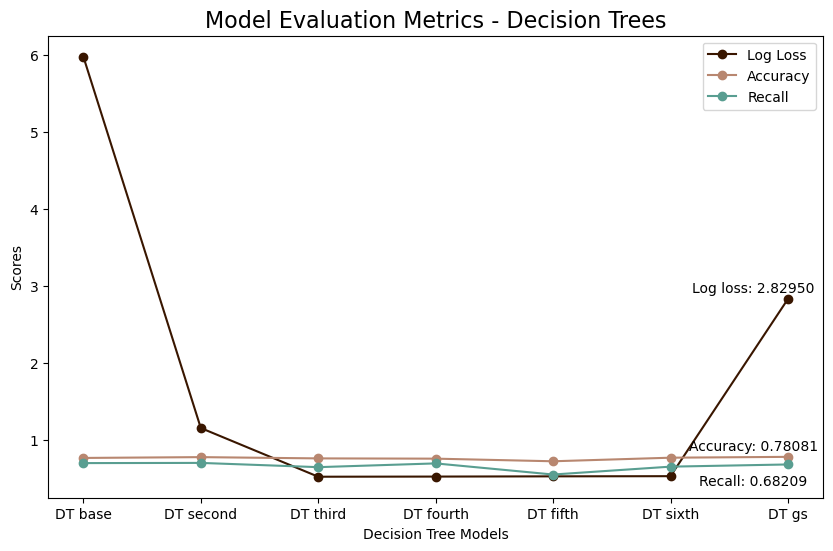

In [141]:
# Creating the x-axis values 
x = range(1, 8)

# Creating the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(x, log_loss_dt, label='Log Loss', marker='o', linestyle='-', color='#391600')
plt.plot(x, accuracy_dt, label='Accuracy', marker='o', linestyle='-', color='#B88770')
plt.plot(x, recall_dt, label='Recall', marker='o', linestyle='-', color='#599E91')

# Customizing x-axis tick locations and labels
x_ticks = ["DT base","DT second","DT third","DT fourth","DT fifth","DT sixth","DT gs"]
plt.xticks(x, x_ticks)

# Adding labels and title
plt.xlabel('Decision Tree Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics - Decision Trees', fontsize=16)

# Adding a legend
plt.legend()

# Showing the data label of the selected index
index_to_annotate = 6  # 2nd index
plt.annotate(f'Log loss: {log_loss_dt[index_to_annotate]:.5f}', (x[index_to_annotate], log_loss_dt[index_to_annotate]), textcoords="offset points", xytext=(-25,5), ha='center')
plt.annotate(f'Accuracy: {accuracy_dt[index_to_annotate]:.5f}', (x[index_to_annotate], accuracy_dt[index_to_annotate]), textcoords="offset points", xytext=(-25,5), ha='center')
plt.annotate(f'Recall: {recall_dt[index_to_annotate]:.5f}', (x[index_to_annotate], recall_dt[index_to_annotate]), textcoords="offset points", xytext=(-25,-15), ha='center')

# Save image
plt.savefig('images/DT_models.png', transparent=True)

# Showing the plot
plt.show()

In [142]:
# Storing the best decision tree model into the relevant variable
dt_best_model = dt_grid_search.best_estimator_

#### 5. c. 6. Scores' Summary

In [143]:
# Evaluating the model
dt_best = 'GridsearchCV DT Model '

# Running the evaluation metrics thanks to the previously defined function
log_loss_dt_best, recall_dt_best, accuracy_dt_best = eval_scores(
    dt_best, dt_best_model, X_test_scaled, y_test)

Evaluation scores for GridsearchCV DT Model  
Log Loss: 2.8294973974473665
Recall Score: 0.6820928518791451
Accuracy Score: 0.7808080808080808


The chosen model prioritizes recall, which measures how well it identifies positive cases. It achieves a recall score of 0.7795, indicating strong performance in this aspect. While the log loss value is higher at 1.5316, signifying uncertainty in predictions, the model maintains an accuracy of 0.6825, offering a good balance between overall accuracy and recall. This makes the model suitable for scenarios where correctly finding positive cases is crucial.


In [144]:
print("Log Loss: {}".format(log_loss_dt_best))
print("The log loss is much higher than the previous best model: kNN: ({}".format(log_loss_knn_fourth) +"). The accuracy in predicting probabilities has decreased.")
print()
print("Recall Score: {}".format(recall_dt_best))
print("Nevertheless, the true positive rate metric has highly increased compared to the {}".format(recall_knn_fourth) +" recorded from Logistic Regression models. The model now correctly identifies actual non-functional rates 68% of the time.")
print()
print("Accuracy Score: {}".format(accuracy_dt_best))
print("The model correctly predicted close to 78% of wells' conditions. This is an improvement compared to the previously recorded {}".format(accuracy_knn_fourth))
print()


Log Loss: 2.8294973974473665
The log loss is much higher than the previous best model: kNN: (0.5080102239905967). The accuracy in predicting probabilities has decreased.

Recall Score: 0.6820928518791451
Nevertheless, the true positive rate metric has highly increased compared to the 0.6306558585114223 recorded from Logistic Regression models. The model now correctly identifies actual non-functional rates 68% of the time.

Accuracy Score: 0.7808080808080808
The model correctly predicted close to 78% of wells' conditions. This is an improvement compared to the previously recorded 0.749023569023569



#### 5. c. 7. Features Importance

We have already determined using RFE the features which had the most impact on our model - but this we will now evaluate them again, using our most recent decision tree.   

In [145]:
# Inspecting feature importances
dt_best_model.feature_importances_

array([0.0507576 , 0.09948664, 0.06600995, 0.01577058, 0.03197783,
       0.11090866, 0.01167471, 0.01601341, 0.00716773, 0.01392774,
       0.01102854, 0.00760748, 0.01498785, 0.01000259, 0.00706389,
       0.01703881, 0.07077598, 0.00298241, 0.01142929, 0.00260366,
       0.00582402, 0.0035386 , 0.00778659, 0.01770807, 0.0033241 ,
       0.00186556, 0.00151301, 0.00419771, 0.01473871, 0.00815003,
       0.17735185, 0.01701401, 0.00734805, 0.00628314, 0.02159481,
       0.00308274, 0.00216566, 0.01590384, 0.01083265, 0.02907742,
       0.01054186, 0.00717038, 0.00571707, 0.02882617, 0.00922861])

It is difficult to grasp the importance of features from the above graph - they will be plotted on a graph for a better understanding. 

To do this, we will first create a color map corresponding to the current color theme/palette.

In [146]:
# Importing relevant packages
from matplotlib.colors import LinearSegmentedColormap

# Defining a colormap that interpolates between the two defined colors
colors = ["#FFF7F2", "#B88770"]
n_bins = 20 

# Creating the custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=n_bins)


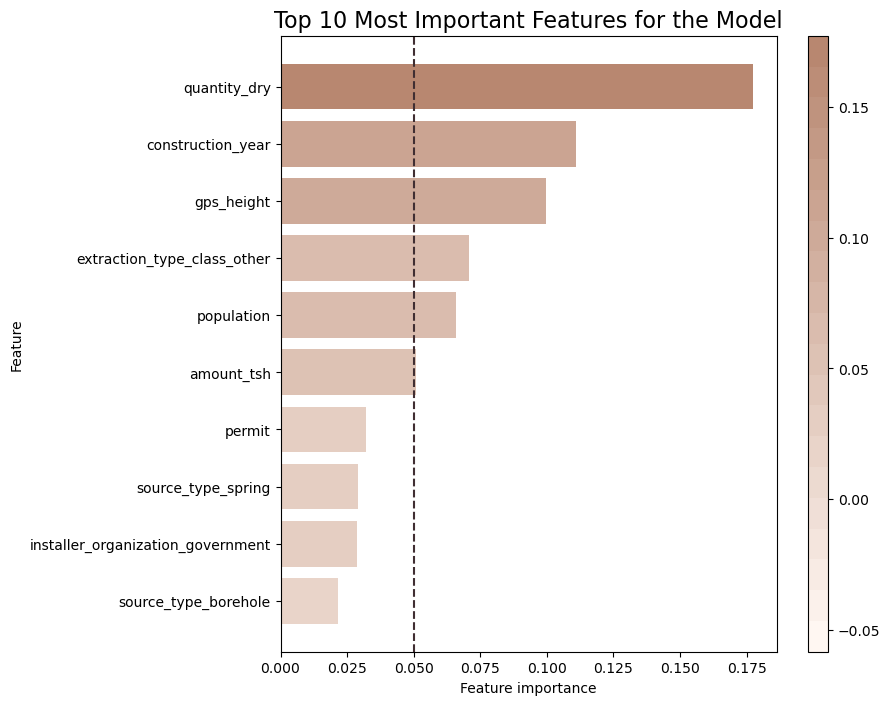

In [147]:
# Importing relevant packages
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Visualizing feature importances with automatically determined colors and sorted in descending order
def plot_top_feature_importances(model, X_columns, top_n, cmap=custom_cmap):
    n_features = X_columns.shape[0]
    feature_importances = model.feature_importances_

    # Sorting feature importances in descending order and get the corresponding indices
    sorted_indices = np.argsort(feature_importances)[::-1]

    # Selecting the top 'top_n' features
    top_indices = sorted_indices[:top_n]

    # Sorting the feature names based on the selected top indices
    top_feature_names = X_columns[top_indices]

    # Sorting the feature importances for the selected top features
    top_feature_importances = feature_importances[top_indices]

    # Reverse the order to make it descending
    top_feature_names = top_feature_names[::-1]
    top_feature_importances = top_feature_importances[::-1]

    # Determining the minimum and maximum importance values
    min_importance = np.min(top_feature_importances) - 0.08
    max_importance = np.max(top_feature_importances)

    # Creating a colormap
    cmap = plt.get_cmap(cmap)

    # Normalizing importance values
    norm = Normalize(vmin=min_importance, vmax=max_importance)

    # Assigning colors to the bars based on the normalized importance values
    colors = cmap(norm(top_feature_importances))

    # Creating the figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))

    bars = ax.barh(range(top_n), top_feature_importances, align='center', color=colors)
    plt.yticks(range(top_n), top_feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.title('Top {} Most Important Features for the Model'.format(top_n), fontsize=16)

    # Adding a colorbar to the right of the plot
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, orientation='vertical', aspect=30)

    # Adding a vertical line at 0.05
    ax.axvline(x=0.05, color='#402E32', linestyle='--', label='Threshold at 0.05')

# Calling the function with the model and the column names, displaying the top 10 features
plot_top_feature_importances(dt_best_model, X_selected.columns, top_n=10)
plt.show()

The training accuracy score was better than the test one, indicating the model is slightly overfitting. 
We will try a fourth model: Random Forest, which is effective at overfitting.

### 5. d. Random Forest

We will use the last Decision Trees model as a baseline. 

Random Forest is an ensemble method that combines the strength of multiple decision trees to improve model performance, and which is effective in reducing overfitting compared to single decision trees.

* **Training Speed**: Moderate. Random Forest builds multiple decision trees in parallel, which is faster than single trees but still slower than linear models.

* **Prediction Speed**: Fast. Aggregating predictions from multiple trees is efficient.

* **Scaling Requirement**: No scaling required. It's not sensitive to feature scaling and handles categorical data well.

* **Key Hyperparameters**: Important hyperparameters include n_estimators (number of trees), max_depth (tree depth), min_samples_split, min_samples_leaf, max_features, and criterion (splitting metric).


#### 5. d. 1. Preparing Data for Modeling

The data was previously prepared - we will just ensure it uses the most recently selected ones. 

#### 5. d. 2. Building an Initial Random Forest Classifier

In [148]:
# from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [149]:
# Instantiating and fitting a 'vanilla' RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5)

The `score` method for classifiers in scikit-learn by default computes the accuracy

In [150]:
# Inspecting the training accuracy score
forest.score(X_train_scaled, y_train)

0.7146576879910214

In [151]:
# Inspecting the test accuracy score
forest.score(X_test_scaled, y_test)

0.714949494949495

This model looks like it is currently performing better than others and shows no signs of overfitting. Nevertheless, we will compare it with the same measures as all other models, using our `eval_scores` function.  

**Evaluating the model**

In [152]:
# Evaluating the model
forest_model = 'Initial Forest'

# Running the evaluation metrics thanks to the previously defined function
log_loss_f, recall_f, accuracy_f = eval_scores(
    forest_model, forest, X_test_scaled, y_test)

Evaluation scores for Initial Forest 
Log Loss: 0.564303903341768
Recall Score: 0.4683861459100958
Accuracy Score: 0.714949494949495


While accuracy looks relatively high and log loss low, the recall score is much lower than we would expect - especially knowing the importance of recall in this context.  

#### 5. d. 3. Building Iterative Models to Find the Best Random Forest Model

We will now try to improve the model by reducing its depth and reducing the number of features chosen. 

<u>Random Forest 2</u>

In [153]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators=5, max_features=5, max_depth= 2)
forest_2.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=2, max_features=5, n_estimators=5)

**Evaluating the model**

In [154]:
# Evaluating the model
forest_2_model = 'Second Forest Model'

# Running the evaluation metrics thanks to the previously defined function
log_loss_f2, recall_f2, accuracy_f2 = eval_scores(
    forest_2_model, forest_2, X_test_scaled, y_test)

Evaluation scores for Second Forest Model 
Log Loss: 0.6128007432340652
Recall Score: 0.3671333824613117
Accuracy Score: 0.6925925925925925


Log loss is increasing and recall is decreasing, we are not improving our model. We will use Combinatoric Grid Searching for hyperparameter tuning to do so.

#### 5. d. 4. Hyperparameter Tuning with Combinatoric Grid Searching - Random Forest


In [155]:
# Instantiating Random Forecast classifier object
rf_classifier = RandomForestClassifier()

In [156]:
# Defining the hyperparameter grid we want to search
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node

}

In [157]:
# Defining a custom scoring function for recall
scorer = make_scorer(recall_score)

In [158]:
# Creating a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=-1)


In [159]:
# Fitting the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(recall_score))

In [160]:
# Accessing the best parameters and the best model 
best_forest_params = grid_search.best_params_
best_forest_model = grid_search.best_estimator_

**Evaluating the model**

In [161]:
# Evaluating the model
gs_forest_model = 'GridSearch Model'

# Running the evaluation metrics thanks to the previously defined function
log_loss_gs_f, recall_dt_gs_f, accuracy_dt_gs_f = eval_scores(
    gs_forest_model, best_forest_model, X_test_scaled, y_test)

Evaluation scores for GridSearch Model 
Log Loss: 0.466290759250241
Recall Score: 0.7190862196020634
Accuracy Score: 0.7964983164983165


In [162]:
# Inspecting the best parameters that were selected
best_forest_params

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

#### 5. d. 5. Choosing and Evaluating the Best Model

In [163]:
# Selecting the best model and storing into the best_forest variable 
best_forest = best_forest_model

In [164]:
# Storing all results into three different lists to plot them into a line graph
log_loss_rf = [log_loss_f, log_loss_f2, log_loss_gs_f]
accuracy_rf = [accuracy_f, accuracy_f2, accuracy_dt_gs_f]
recall_rf = [recall_f, recall_f2, recall_dt_gs_f]

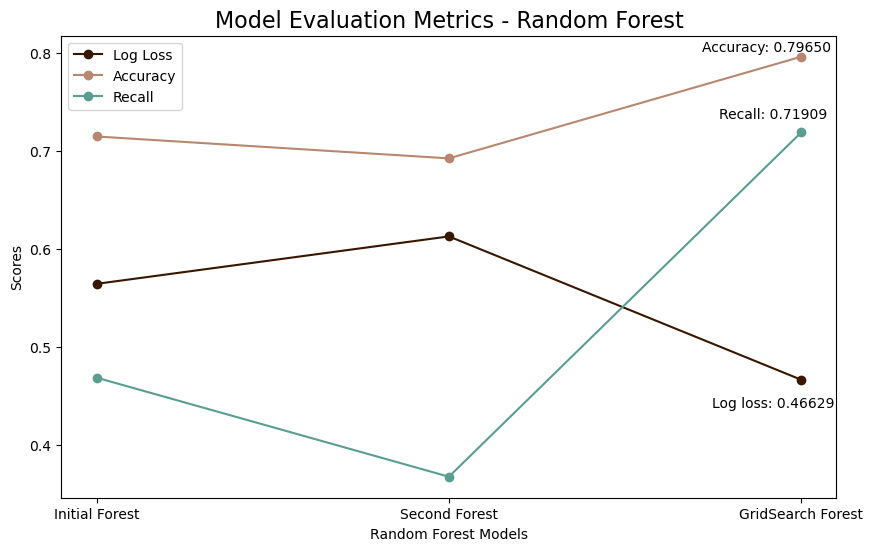

In [165]:
# Creating the x-axis values 
x = range(1, 4)

# Creating the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(x, log_loss_rf, label='Log Loss', marker='o', linestyle='-', color='#391600')
plt.plot(x, accuracy_rf, label='Accuracy', marker='o', linestyle='-', color='#B88770')
plt.plot(x, recall_rf, label='Recall', marker='o', linestyle='-', color='#599E91')

# Customizing x-axis tick locations and labels
x_ticks = ["Initial Forest","Second Forest", "GridSearch Forest"]
plt.xticks(x, x_ticks)

# Adding labels and title
plt.xlabel('Random Forest Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics - Random Forest', fontsize=16)

# Adding a legend
plt.legend()

# Showing the data label of the selected index
index_to_annotate = 2  # 2nd index
plt.annotate(f'Log loss: {log_loss_rf[index_to_annotate]:.5f}', (x[index_to_annotate], log_loss_rf[index_to_annotate]), textcoords="offset points", xytext=(-20,-20), ha='center')
plt.annotate(f'Accuracy: {accuracy_rf[index_to_annotate]:.5f}', (x[index_to_annotate], accuracy_rf[index_to_annotate]), textcoords="offset points", xytext=(-25,4), ha='center')
plt.annotate(f'Recall: {recall_rf[index_to_annotate]:.5f}', (x[index_to_annotate], recall_rf[index_to_annotate]), textcoords="offset points", xytext=(-20, 10), ha='center')


# Saving the plot as a PNG with a transparent background
plt.savefig('images/forest_models.png', transparent=True)

# Showing the plot
plt.show()

#### 5. d. 6. Scores' Summary

In [166]:
# Evaluating the model
best_forest_name = 'GridSearch Model'

# Running the evaluation metrics thanks to the previously defined function
log_loss_gs_f, recall_dt_gs_f, accuracy_dt_gs_f = eval_scores(
    best_forest_name, best_forest_model, X_test_scaled, y_test)

Evaluation scores for GridSearch Model 
Log Loss: 0.466290759250241
Recall Score: 0.7190862196020634
Accuracy Score: 0.7964983164983165


The chosen model prioritizes recall, which measures how well it identifies positive cases. It achieves a recall score of 0.7795, indicating strong performance in this aspect. While the log loss value is higher at 1.5316, signifying uncertainty in predictions, the model maintains an accuracy of 0.6825, offering a good balance between overall accuracy and recall. This makes the model suitable for scenarios where correctly finding positive cases is crucial.


In [167]:
print("Log Loss: {}".format(log_loss_gs_f))
print("Rhe model performance has considerably increased compared to the last model: the log loss is back to reasonable results, indicating a much better accuracy of the predicted probabilities.")
print()
print("Recall Score: {}".format(recall_dt_gs_f))
print("This is the best recall score recorded. The model now correctly identifies actual non-functional wells 72% of the time.")
print()
print("Accuracy Score: {}".format(accuracy_dt_gs_f))
print("The model correctly predicted over 79% of wells' conditions. This is the best score reached among all models as well.")
print()


Log Loss: 0.466290759250241
Rhe model performance has considerably increased compared to the last model: the log loss is back to reasonable results, indicating a much better accuracy of the predicted probabilities.

Recall Score: 0.7190862196020634
This is the best recall score recorded. The model now correctly identifies actual non-functional wells 72% of the time.

Accuracy Score: 0.7964983164983165
The model correctly predicted over 79% of wells' conditions. This is the best score reached among all models as well.



### 6. Evaluation

#### 6. a. Final Model and Classification Metrics

In [168]:
# Storing the best model in the associated variable
best_model_overall = best_forest

The model that predicts the most accurately the  non functional wells is the Random Forest where Hyperparameters were tuned thanks to Combinatorics GridSearching. 
The best parameters found for this model were the following:

In [169]:
# Viewing the best parameters defined by Combinatoric Grid Searching 
best_forest_params

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [170]:
# Defining variables for the final model's classification metrics
best_overall = 'Best Model Overall'

log_loss_best, recall_best, accuracy_best = log_loss_gs_f, recall_dt_gs_f, accuracy_dt_gs_f

In [171]:
# Printing classification metrics
print("Evaluation scores for {} ".format(best_overall))

print("Log Loss: {}".format(log_loss_best))
print("Recall Score: {}".format(recall_best))
print("Accuracy Score: {}".format(accuracy_best))

Evaluation scores for Best Model Overall 
Log Loss: 0.466290759250241
Recall Score: 0.7190862196020634
Accuracy Score: 0.7964983164983165


In [172]:
# Storing all 4's best models metrics into corresponding lists 
log_loss_all = [log_loss_reg_selected, log_loss_knn_fourth, log_loss_dt_best, log_loss_gs_f] 
recall_all = [recall_reg_selected, recall_knn_fourth, recall_dt_best, recall_dt_gs_f]
accuracy_all = [accuracy_reg_selected, accuracy_knn_fourth, accuracy_dt_best, accuracy_dt_gs_f]

In [173]:
# Creating a DataFrame with stored best scores 

models = ['Logistic Regression', 'k-Nearest Neighbor', 'Decision Tree', 'Random Forest with GridSearch']

data = {
    'Model': models,
    'Log Loss': log_loss_all,
    'Recall': recall_all,
    'Accuracy': accuracy_all
}

df = pd.DataFrame(data)

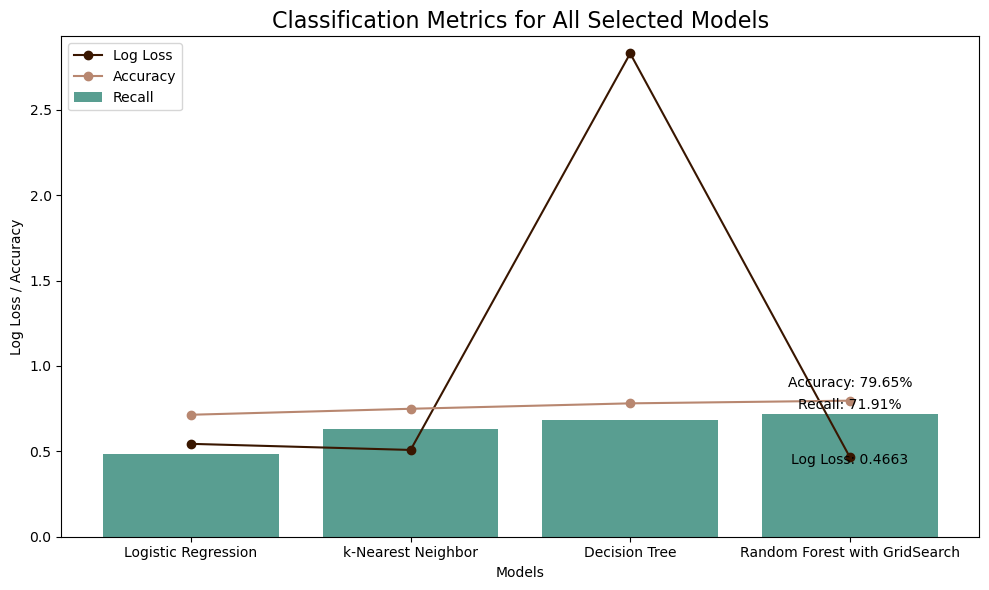

In [174]:
# Creating a bar chart for Recall
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Recall'], color='#599E91', label='Recall')

# Creating line plots for Log Loss and Accuracy
plt.plot(df['Model'], df['Log Loss'], marker='o', color='#391600', label='Log Loss')
plt.plot(df['Model'], df['Accuracy'], marker='o', color='#B88770', label='Accuracy')

# Setting labels and title
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylabel('Log Loss / Accuracy')#, color='tab:orange')

# Annotating the last index of each category
plt.annotate(f'Recall: {recall_all[3] * 100:.2f}%', (models[3], recall_all[3] + 0.01), ha='center', va='bottom')
plt.annotate(f'Log Loss: {log_loss_all[3]:.4f}', (models[3], df['Log Loss'][3] - 0.06), ha='center', va='bottom')
plt.annotate(f'Accuracy: {accuracy_all[3] * 100:.2f}%', (models[3], df['Accuracy'][3] + 0.06), ha='center', va='bottom')


    
# Defining the max value of y 
max_y = max(df[['Log Loss', 'Accuracy']].max())
plt.ylim(0, max_y  + 0.1)
plt.title('Classification Metrics for All Selected Models', fontsize=16)

# Displaying the legend
plt.legend(loc='upper left')

# Saving the plot as a PNG with a transparent background
plt.savefig('images/final_model.png', transparent=True)

# Showing the plot
plt.tight_layout()
plt.show()

In the analysis of predictive models for identifying non-functional water wells in Tanzania, four types of models were employed: 
1. Logistic Regression, 
2. k-Nearest Neighbor, 
3. Decision Tree, and 
4. Random Forest 


Among these models, the Random Forest model showed the best classification metrics. To achieve these results, hyperparameters were tuned using combinatoric grid searching. 

The highest `recall` of all models was recorded. The model correctly identified about 72% of the actual non-functional water wells in the dataset. In other words, it minimizes the chances of false negatives which is crucial as populations' healths and lives depend on the quality of the water they have access to.

Moreover, the highest `accuracy` highlighted its overall predictive power in accurately identifying wells. This indicates that the model correctly classified over 79% of all water wells.

Furthermore, as `log loss` quantifies the uncertainty associated with the model's predictions. It measures how well the model's predicted probabilities align with the actual outcomes. 
The probabilities that a well is predicted as non-funtional are the most accurate they could be.

## 7. Findings & Recommendations

#### 7.a. Model Performance

The model accurately predicts 72% of non-functional wells, and 79% of all wells. 

In [175]:
# Import classification_report and confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

# Test set predictions
y_pred = best_model_overall.predict(X_test_scaled)

cnf_matrix = confusion_matrix(y_test, y_pred) 
# Confusion matrix and classification report
print(cnf_matrix)
print(classification_report(y_test, y_pred))

[[6949 1116]
 [1906 4879]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      8065
           1       0.81      0.72      0.76      6785

    accuracy                           0.80     14850
   macro avg       0.80      0.79      0.79     14850
weighted avg       0.80      0.80      0.79     14850



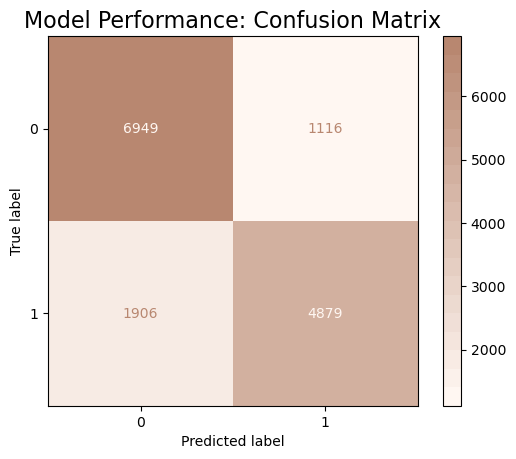

In [176]:
# Creating a custom colormap, corresponding to the theme colors 
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=best_model_overall.classes_)


disp.plot(cmap=custom_cmap)

plt.title("Model Performance: Confusion Matrix", fontsize=16)

# Saving the plot as a PNG with a transparent background
plt.savefig('images/confusion_matrix.png', transparent=True)

plt.show()

**Confusion Matrix**

* The bottom-right value (4,886) represents the True Positives (TP): the correctly predicted non-functional wells. They represent 72% of total non-functional instances (4,886 + 1,892).   

* The bottom-left value (1,892) represents False Negatives (FN). The goal of these models was to make this value as low as possible, as it indicates the number of water wells that are non-functional, but that the model classed as functional. 
    
    This is dangerous, as lives and populations' healths may be harmed by such an error.


<u>Other metrics</u> <br>
`Recall` measures the ability to identify all actual positive instances (actual non-functional water points) while `Precision` measures the accuracy of positive predictions. This means that out of all the instances that the model predicted as non-functional water wells, 81% were actually non-functional. This indicates a relatively high accuracy of the model's predictions for non-functional water wells.


`F1` Score is a balance between precision and recall, combining both metrics.
0.76. It suggests that the model provides a reasonable compromise between making accurate positive predictions (precision) and correctly identifying all actual positive instances (recall). 

#### 7.b. Most Important Features

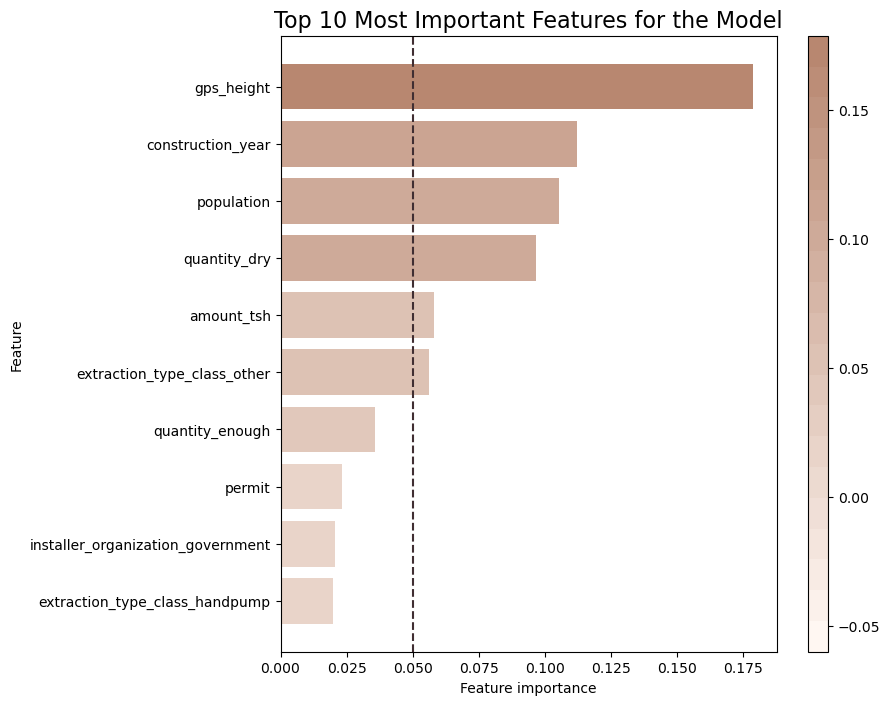

In [177]:
# Calling the function with the model and the column names
plot_top_feature_importances(best_model_overall, X_selected.columns, top_n=10)

# Saving the plot as a PNG with a transparent background
plt.savefig('images/Top 10 Features.png', transparent=True, bbox_inches='tight')

plt.show()

The most important features that will help determining the most accurate predictions, whether a water well is non functional are:
1. <u>gps height</u>: the altitude of the well
2. <u>construction_year</u>: the year the waterpoint was constructed 
3. <u>population</u>: the population around the well 
4. <u>quantity_dry</u>:  whether the quantity of water was defined as 'dry'
5. <u>amount_tsh</u>:total static head (amount water available to waterpoint)
6. <u>extraction_type_class_other</u>: the kind of extraction the waterpoint uses. In this case, the specific feature impacting is any other extraction type than 'gravity', 'submersible', 'handpump', 'motorpump', 'wind-powered', or 'rope pump'


#### 7.c. Purposes of Model's Predictions

The predictions provided by this model would be useful for an NGO aiming at predicting whether water wells are non functional to improve their maintenance. There also are limits to how useful these predictions can be.  

* <u>Useful</u>: when prioritizing maintenance efforts for water wells in Tanzania. It can help identify non-functional wells that require immediate attention, enabling NGOs to allocate their resources and funding efficiently.
* <u>Not useful</u>: where the input data is outdated or inaccurate. The source training the model dates from data from 2011 to 2013. In addition, if only part of the information is available, or not the most important features are given, the predictions may not be reliable. 
    This model was based on information from Tanzania only. Predicting a water point's functionality in another country may not be done with this model.

#### 7.d. How to Achieve Better Predictions

Suggestions for how certain input variables might be modified to achieve  better predictions: 


1. Enhance data quality by collecting accurate and complete input variables, including current well conditions, pump types, and management details.

2. Include local knowledge and qualitative data by collaborating with local communities to gather valuable insights not present in the existing dataset.

3. Promote open data sharing with other NGOs working towards a common goal, fostering a shared knowledge of well information for up-to-date results.

4. Implement a feedback system for local communities to validate predictions, ensuring continuous model improvement.


## 8. Limits & Next Steps

1. Data quality: the data was recorded between 2011 and 2013 and is most likely out of date. More recent data must be captured in order to make more accurate predictions.
<br>

2. Predictions reliability: despite the best results being recorded and an accuracy of close to 80%, there is a margin of error and false positive results may occur. Ensure regular maintenance and verification of the wells before allowing entire populations to rely on them. 
<br>
3. Scalability concerns: the model's run time is long which may prevent to scale to analyze larger number of water wells in a reasonable timeframe. Potential next steps include to optimize the model by implementing more efficient algorithms, or modify processing techniques.  
